
# Is the degree of political polarization in opinions given by Twitter users a good predictor of voter turnout in the 2020 US elections?



## Introduction

The purpose of this paper is to understand whether the degree of political polarization in tweets during the 2020 US elections significantly explains variation in voter turnout. We focus on Twitter as the sample for the populations political preferences because it has become a public forum for expression of political opinions in the modern social media age. This is an important result as it acts as a base from which we can design larger studies to understand whether increasing political polarization in US politics has reduced voter turnout. High voter turnout is an important indicator of a healthy democracy and a politically active citizenry which is why understanding causal influences on voter turnout, specifically polarization, is important to ensure civic society and organizations can take steps to mitigate voter demobilization. we will also be evaluating through visualizations whether our data is representative of the populations political preferences.

In this paper, We define political polarization as the emotional intensity of tweets measured on a scale from 1 to -1 using a pre-trained sentiment analysis model. Thus, the degree of political polarization would be those tweets whose sentiment scores extend towards 1 and -1. Voter turnout is simply the percentage of individuals in the voting population who ended up voting in the November 2020 elections. This task will be done using the dataset 'US Election 2020 Tweets' which can be found on Kaggle. 
We will investigate the effect of polarization on voter turnout using a regression model with voter turnout as our response and sentiment scores as our predictor. Since a base assumption of linear regression is that the model accounts for all possible variables that influence the response, we will have to control for other exogenous variables so that we do not have a bias in our estimate for sentiment scores. To account for this, we will merge variables like income,age, education, marriage status among others that influence voter turnout using US census data and overlaying that at the county level. Then finally, we will use machine learning techniques and run a regression tree to evaluate the overall predictive power of our independent variables which we will compare with our regression model to see whether sentiments are influential or not. 

Thus, when pursuing this research question we are making the following assumptions:

**Assumptions**

- the sentiment analysis of tweets is representative of the political preferences of the US population i.e that twitter users    are a good sample to use when making inference on the US population.
- twitter user tweeting from county is representative of the average resident of the county(i.e group level characteristics like   age, income are average).
- Divergence in sentiments is a good measure for polarization.
- Follower count and likes count is a good way to measure the reach of sentiments expressed

**result summary**
  
to summarize our results, we found that our data seems to be representative but with some potential biases stemming from problems in our group assumption (twitter user representative of average county resident) due to outliers in merged data and because of a potential left-wing bias in the twitter data. Moreover, we find that sentiments weighted by follower count has a positive  influence on voter turnout based on our regression model. However, our regression tree tells us that sentiments have no predictive power. 

**Maps summary**

Our maps  depict that there is no significant connection between age, income, and sentiment scores apart from some outliers and a potential anti-trump bias as mentioned before in the results summary.

**significance of research question**

Overall, this is an important research question because it seeks to study whether a more polarized political climate incentivizes or disincentivizes political participation. This result will have important implications on the health of democracy in this age of increasing polarization.





**Literature review**

In the book *Red and Blue Nation? by Pietro S Nivola and David W Brady* the authors find that increased negative and polarized political advertising rather than reduce voter turnout, actually increased voter turnout. Moreover, they found that turnout decay coincided with times when the political elite were uncommonly close ideologically. This is interesting as it gives us a hypothesis to work with, namely that a *higher degree of polarization increases voter turnout*. This finding comes from US election data from the 1990s.

In the paper *Quantifying polarization across political groups on key policy issues using sentiment analysis by Dennies Bor,Benjamin Seiyon Lee* the authors found that differences sentiment scores across certain topics is a good proxy for understanding differences in political positions. Moreover, this paper specifically uses the Valence Aware Dictionary for Sentiment Reasoning (VADER) package for calculating sentiment scores on twitter data which is what we will also be using. We can safely assume from this paper that sentiment score divergence is a good way to measure political polarization on twitter.

In the paper *Division Does Not Imply Predictability: Demographics Continue to Reveal Little About Voting and Partisanship by Seo-Young Silvia Kim*, the authors state that demographic differences/social sorting has a modest impact on predicting political behaviour and partisanship. What this means is that although the effect is not significant, there is some effect which is what we will look into. This justifies the inclusion of demographic variables in our regression model as they affect political polarization (sentiment scores). Thus, we can use short regression to assess the correlation between our predictors so that our estimates are not biased.

In the paper 'The Bush Effect: Polarization, Turnout, and Activism in the 2004 Presidential Election' by Alan Abrahamowitz, evidence shows that intense polarization among the electorate in relation to George Bush actually increased activism and voter turnout. This supports the mobilization hypothesis we made earlier. Moreover, in the same way this study focused on George W Bush's election we focus on Trump as a focal point for polarization. 



## Data Cleaning/Loading

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from shapely.geometry import Point


In [3]:
!pip install -q linearmodels

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
import subprocess

In [4]:
#loading a pre-trained sentiment analysis model
command = ['pip', 'install', 'vaderSentiment']

# Run the command silently
subprocess.run(command, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
#! pip install vaderSentiment


CompletedProcess(args=['pip', 'install', 'vaderSentiment'], returncode=0)

In [5]:
!pip install nbconvert > /dev/null

**Here we are importing a pre-trained sentiment analysis model called Vader.**

In [6]:
#importing model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#Initializing model
analyzer = SentimentIntensityAnalyzer()

# Declare some text
angry_review = 'The food was disgusting. I am never coming back here again!!'
# Analyze the text with polarityScores
analyzer.polarity_scores(angry_review)


{'neg': 0.285, 'neu': 0.715, 'pos': 0.0, 'compound': -0.6103}

In [7]:
df = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')

In [8]:
df.head(20)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651
6,2020-10-15 00:00:17,1.316529e+18,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,Twitter for iPhone,7.674018e+17,Michael Wilson,wilsonfire9,NaN,...,75.0,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.239299182
7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",...,766.0,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.612515712
8,2020-10-15 00:00:20,1.316529e+18,One of the single most effective remedies to e...,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",...,151.0,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243
9,2020-10-15 00:00:21,1.316529e+18,#Election2020 #Trump \n#FreedomOfSpeech https:...,0.0,0.0,Twitter Web App,1.305533e+18,Johnny Quest,JohnnyQuest22,Independent\n\nWhat is your American Dream?\nT...,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:03.358948773


Considering that we have almost 1 million observations, we first want to take a random sample of the raw data for quicker computation.We take around 10% of all observations which amount to around 97,092 observations.

In [9]:
#random.seed(1008576140)
df_final = df.sample(frac = 0.70,random_state=100)
df_final.shape

(679643, 21)

We then see if there are any missing values in our variables of interest. In this case we are looking at likes, retweets, followers, and state.

In [10]:
df_final.isnull().any(axis = 0)

created_at              False
tweet_id                False
tweet                   False
likes                   False
retweet_count           False
source                   True
user_id                 False
user_name                True
user_screen_name        False
user_description         True
user_join_date          False
user_followers_count    False
user_location            True
lat                      True
long                     True
city                     True
country                  True
continent                True
state                    True
state_code               True
collected_at            False
dtype: bool

We then check for any duplicated values that will need removal.

In [11]:
df_final.duplicated().sum()

0

Since there are none, we need not worry about them.

We then proceed to drop all the missing values so that we can conduct analysis on available data. We are left with 19,112 observations.

In [12]:

df_cleaned = df_final.dropna()
df_cleaned.shape

(132606, 21)

**We now calculate the sentiment scores per tweet and plot the distribution**

Text(0, 0.5, 'frequency')

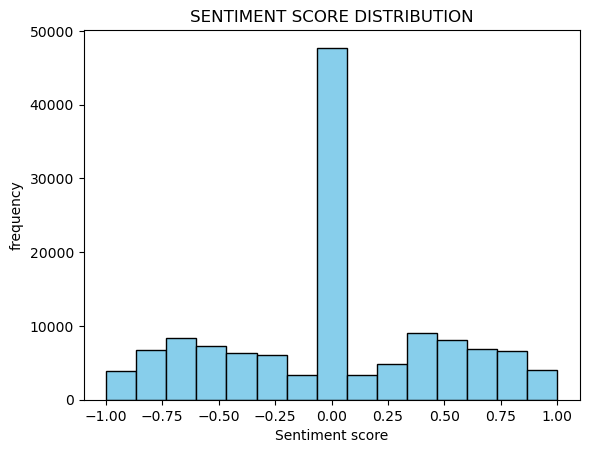

In [13]:



def calculate_sentiment(x):
    score = []
    for i in x:
        score.append(analyzer.polarity_scores(i)['compound'])
    score_df = pd.DataFrame(score, columns=['compound_score'])
    return score_df
    
calculate_sentiment(df_cleaned['tweet']).head()

sentiment_scores = calculate_sentiment(df_cleaned['tweet'])

plt.hist(sentiment_scores, edgecolor = 'black', color = 'skyblue', bins = 15)
plt.title('SENTIMENT SCORE DISTRIBUTION')
plt.xlabel('Sentiment score')
plt.ylabel('frequency')
        


**Maybe if we add likes as a modifier we find that although the number of higly negative posts is much lesser, their engagement is much higher. This means that there are less people who post extreme stuff, but there are a lot of people that agree with them.

In [14]:
sentiment_scores['tweet_id'] = df_cleaned['tweet_id']
sentiment_scores.set_index('tweet_id')
df_cleaned.set_index('tweet_id')

df_cleaned = pd.merge(df_cleaned, sentiment_scores, on="tweet_id")
df_cleaned.shape

(20560, 22)

**Computing sentiment score weighted by follower count**

The sentiment scores represent the sentiments of the individual tweets in the data. However, since we want to treat the twitter data sample as representative of the populations political preferences, we must understand the engagement that each tweet gets which tells us the reach the sentiments expressed get. One way to factor this in is to use user follower count to do a weighted calculation of sentiments scores, wherein we multiply follower count of twitter handle with the sentiment score of the tweet. This will give us a more robust picture of the 'reach' of political sentiments expressed in these tweets. We will do the same using 'likes' as a means of weighting sentiments to produce an alternative measure of reach. In doing this we assume:

- the sentiments expressed in the tweet represent the broad sentiments of the followers of the twitter handle
- the number of likes the tweet receives indicates the number of people who resonate with the sentiments of the tweet

Thus, we wish to use both follower count and likes as a 'reach' measure coupled with our existing sentiment score distribution. When computing both, we will normalize follower count and likes count so that we are working within the same scale when multiplying them with sentiment scores.

In [15]:
#creating weighted sentiments (using follower count)
normalized_data = (df_cleaned['user_followers_count']- np.min(df_cleaned['user_followers_count'], axis=0)) / (np.max(df_cleaned['user_followers_count'], axis=0) - np.min(df_cleaned['user_followers_count'], axis=0))
df_cleaned['norm_follower_count'] = normalized_data

In [16]:
#plt.hist(normalized_data)
#plt.xlim(0,0.25)
#plt.show()

In [17]:
df_cleaned['weighted_sentiments_follower'] = df_cleaned['compound_score']*df_cleaned['norm_follower_count']

#plt.hist(df_cleaned['weighted_sentiments_follower'],bins=50)
#plt.xlim(-0.05,0.03)
#plt.show()

In [18]:
df_cleaned['weighted_sentiments_follower'] = pd.to_numeric(df_cleaned['weighted_sentiments_follower'], errors='coerce')

In [19]:
# creating sentiments weighted by likes
normalized_data_likes = (df_cleaned['likes']- np.min(df_cleaned['likes'], axis=0)) / (np.max(df_cleaned['likes'], axis=0))
df_cleaned['norm_likes'] = normalized_data_likes
df_cleaned['weighted_sentiments_likes'] = df_cleaned['compound_score']*df_cleaned['norm_likes']
df_cleaned['weighted_sentiments_likes'] = pd.to_numeric(df_cleaned['weighted_sentiments_likes'], errors='coerce')
                                                                                      

## Summary Statistics

In [20]:
random.seed(1008576140)
def format_number(x):
    return '{:.6f}'.format(x) if isinstance(x, (int, float)) else x
summary_stats = df_cleaned.describe()
summary_stats_final = summary_stats.drop([ 'tweet_id','user_id','lat','long','norm_follower_count','norm_likes','retweet_count'], axis = 1)
summary_stats_final = summary_stats_final.applymap(format_number)
summary_stats_final

,likes,user_followers_count,compound_score,weighted_sentiments_follower,weighted_sentiments_likes
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,8.395477,22285.120866,0.003482,0.000263,0.000047
std,138.311387,193017.052179,0.475114,0.015595,0.008418
min,0.000000,0.000000,-0.996000,-0.312159,-0.224506
25%,0.000000,220.000000,-0.318200,-0.000012,0.000000
50%,0.000000,1165.500000,0.000000,0.000000,0.000000
75%,1.000000,3070.000000,0.361200,0.000013,0.000000
max,11670.000000,6488193.000000,0.999900,0.817344,0.951400


**Interpretation of likes summary table**:

based on the interquartile range, 50% data points for number of likes are between 0-2. This is in stark contrast to the mean which is much higher at 11.76. The most striking is that the standard deviation is 211.3 which is more than 10 times bigger than the mean itself. Such a massive standard deviation given our mean and interquartile range implies the presence of extreme outliers, which are severely skewing the data. Based on our max value, it is clear that there is a massive right skew in our likes distribution. this is interesting as it shows that a very small number of posts produce a disproportionately high number of likes from a likes share point of view. *This means that even if a few twitter posts had positive sentiments, the reach of those sentiments is much greater than the majority of posts that have negative sentiments*.

**Interpretation of follower summary table**

the interquartile range suggests that 50% of all values fall within 187 to 3,313 followers. The mean follower count is 31,588 with the standard deviation being 261,690. This implies that like the previous summary, there are outliers that lead to a large standard deviation and mean, despite most values being within 187 and 3,313. Like before, there is a big right skew implying that there are a few accounts in the dataset that have a disproportionately high share of followers. Again, this will likely have a similar impact on the reach of sentiments as it did with likes wherein a small number of tweets with negative or positive sentiments will have more reach than the majority sentiments expressed in the tweets. *The follower count table does seem relatively more skewed than likes. I say this because the maximum follower count is 291 times the mean follower count whereas the max likes is 138 times the mean likes.*

**interpretation of sentiment score table**

The sentiment data is fairly symmetric with Mean at 0.0035 and Median at 0 being fairly close to each other. this suggests a fairly even split between pro and anti trump tweets. We definitely have extreme views as well since -0.9 and +0.9 are the minimum and maximum respectively. Considering that the distribution is quite normal, the weighted sentiments will give a good picture of the reach of sentiments. This could potentially hint towards the dominant political position in the US.

**interpretation of sentiments weighted by followers and likes table**

the mean sentiment score weighted by followers is higher than that of likes. The spread of sentiment scores weighted by followers is also more than that of likes. Both of them being positive suggests that there must be a relatively greater reach for positive sentiments (pro-trump) tweets. The difference in means suggests that sentiments have a greater pro-trump reach if we were looking at follower count. However, the sentiments weighted by likes have a higher maximum than that of follower count. This suggests that despite follower count being more skewed, there seems to be a higher number of likes in the extreme position relative to follower count. To conclude on the differences between the two measures, a histogram will have to be computed.

To conclude from our summary statistics, It is clear that we have to look at the small number of highly influential data points as opposed to the majority number of non-influential data points. We can also even out the skewed distributions using a log scale and make interpretations on that basis.

# Plots, Histograms, Figures

We are first plotting histograms of our x variables which are in this case follower count, likes, and retweet count. The following is a histogram of follower count.

Text(0, 0.5, 'frequency')

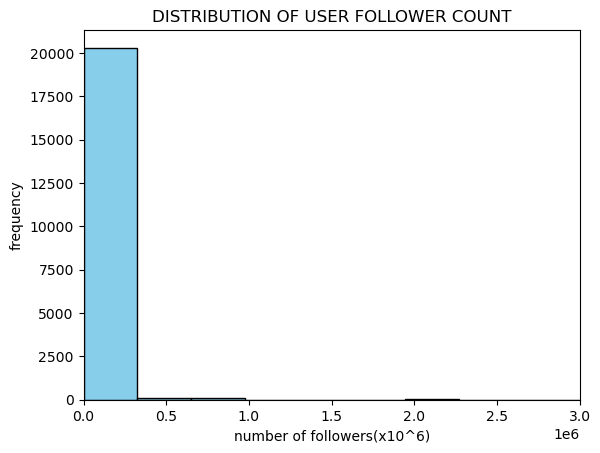

In [21]:
plt.hist(df_cleaned['user_followers_count'], bins = 20, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,3000000])
plt.title('DISTRIBUTION OF USER FOLLOWER COUNT')
plt.xlabel('number of followers(x10^6)')
plt.ylabel('frequency')

The following is the plot for follower count. As was clear in the summary tables, majority of followers range between 0 to 500,000. We considered two main options which was filtering out the no-influential data and keeping the outliers versus using a log scale to even out the distribution. Let us apply a log transformation on follower count and plot the corresponding histogram.

Text(0, 0.5, 'frequency')

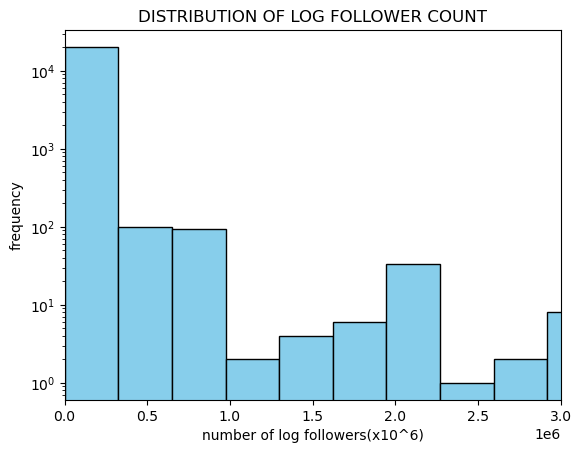

In [22]:
#histogram of followers count
plt.hist(df_cleaned['user_followers_count'],log = True, bins = 20, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,3000000])
plt.title('DISTRIBUTION OF LOG FOLLOWER COUNT')
plt.xlabel('number of log followers(x10^6)')
plt.ylabel('frequency')
#if we used linear scale, there would be only one bar (follower count between 0 to 5 500,000 followers).
# log scale spreads the distribution out

#sns.violinplot(x = np.log(df_cleaned['user_followers_count']))
#plt.show()


As we can see, the histogram does prove to be less skewed when we take log follower count. This is because the log function compresses larger values more than it does smaller values. Thus, the outliers to the right (very large values) are compressed such that the absolute change in log values between the small and large numbers are lesser. The relative percent difference in large and small numbers is represented still by absolute change in log values so that information is not lost. We can use the absolute changes, thus, to get an understanding of how percent change in follower count influences engagement (likes).

We can see that most accounts have followers between 0 to 1 million. *This is important as it shows us the degree of influence that any one account may have and its subsequent influence on engagement and thus, public opinion.*


Text(0, 0.5, 'frequency')

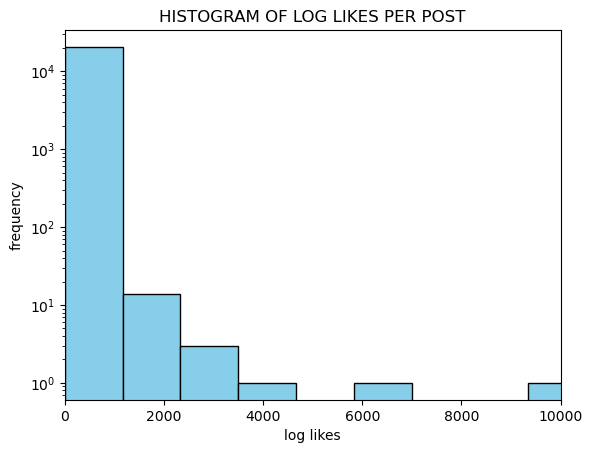

In [23]:
#histogram of likes count
plt.hist(df_cleaned['likes'],log=True, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,10000])
plt.title('HISTOGRAM OF LOG LIKES PER POST')
plt.xlabel('log likes')
plt.ylabel('frequency')
#used log-scale again for similar purposes.


This is a histogram for the number of likes. Like before, a log scale has been applied to correct the skew and make analysis easier. As we can see, most likes are between 0 to 2000 log likes, however some posts do reach 8000 log likes. This can be because some posts are made my accounts with a lot of followers or simply because the content and timing of the post made it resonate with Twitter users. *This is an important measure as it shows us the degree of engagement of Twitter users when it comes to the elections (specifically Trump).*

Now let us compare the sentiment score distributions weighted by followers and likes

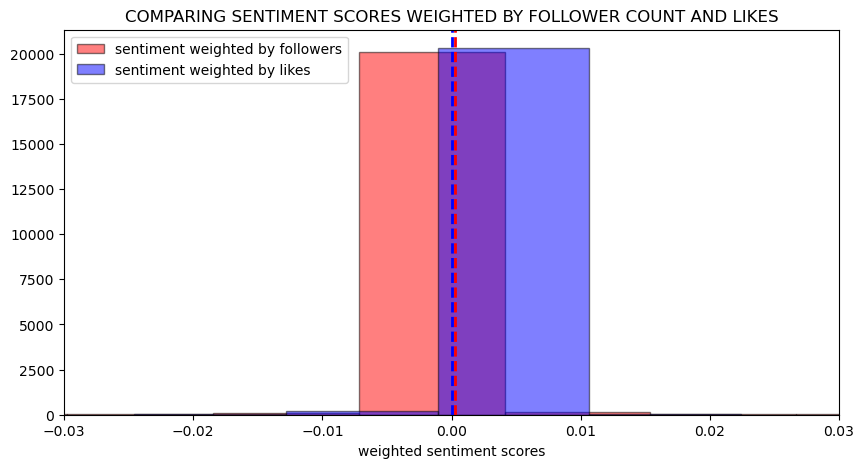

In [24]:
plt.figure(figsize=(10, 5))

# Plot histogram for data1
plt.hist(df_cleaned['weighted_sentiments_follower'], bins=100, color='red', edgecolor = 'black',alpha=0.5, label='sentiment weighted by followers')

# Plot histogram for data2
plt.hist(df_cleaned['weighted_sentiments_likes'], bins=100, color='blue', edgecolor = 'black',alpha=0.5, label='sentiment weighted by likes')

# mean follower and likes
plt.axvline(x=0.000263, color='r', linestyle='--', linewidth=2)#follower
plt.axvline(x=0.000047, color='b', linestyle='--', linewidth=2)#likes

plt.xlabel('weighted sentiment scores')
plt.title('COMPARING SENTIMENT SCORES WEIGHTED BY FOLLOWER COUNT AND LIKES')
plt.xlim(-0.03,0.03)
plt.legend()
plt.show()

 This plot better represents what our summary table has showed us. Sentiments weighted by likes show a better pro-trump reach that the tweets have whereas sentiments weighted by followers have a more anit-trump reach. The means are close to zero, showing that the distribution is still overall centred, with mean sentiment being neutral. this is an interesting results because it seems that more influential accounts from a followers point of view are posting pro-trump content but more posts with high like counts are posting anti-trump content. However, most of the points are not at the extremes, instead being within 0.03 and -0.03. This means that overall the polarization is not massive. 
 
 Another very interesting observation is that the the sentiments weighted by followers has a rightward extreme that is higher than all the sentiments weighted by likes. The opposite is true for sentiments weighted by likes. **This is interesting as it suggests that at the extremes the trend changes between sentiments weighted by likes relative to followers**. In other words, the most liked post is likely an anti-trump post eventhough most posts liked have a pro-trump reach. Vice versa, the account with most followers seems to have a pro-trump view eventhough most accounts have a relatively anti-trump view. The reason that the extremes are not very visible is because the distribution of likes and followers is extremely skewed which compresses the data by a lot. 

The previous exploration also suggests that there is no clear linear pattern between follower count and sentiments or likes and sentiments. If sentiment scores increase, there is no guarantee that it would increase likes or followers as we have very skewed distributions that can lead to very biased OLS estimates of a linear regression trend. Still, we will see if a linear trend exists at all using scatterplots. 

In [25]:
df_cleaned['log_follower'] = np.log(df_cleaned['user_followers_count'])
df_cleaned['log_likes'] = np.log(df_cleaned['likes'])

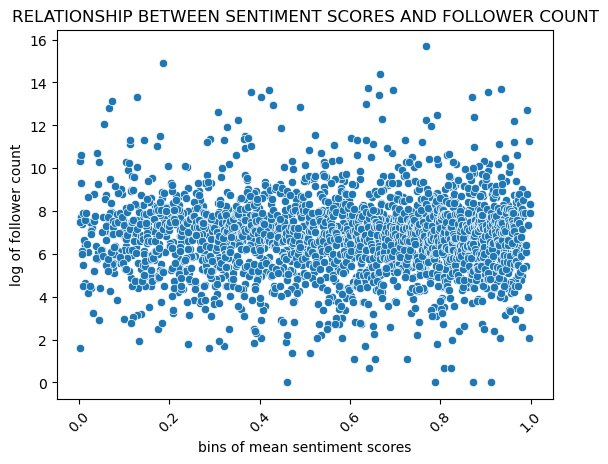

In [26]:
df_cleaned['bin_sentiment'] = pd.cut(df_cleaned['compound_score'], bins=5000)  # Adjust the number of bins as needed
df_cleaned['bin_sentiment_midpoint'] = df_cleaned['bin_sentiment'].apply(lambda x: x.mid).astype(float)
summary_df = df_cleaned.groupby('bin_sentiment_midpoint').agg({'log_follower':'mean'}).reset_index()


sns.scatterplot(x=abs(summary_df['bin_sentiment_midpoint']), y=summary_df['log_follower'])
plt.xticks(rotation=45)
plt.title('RELATIONSHIP BETWEEN SENTIMENT SCORES AND FOLLOWER COUNT')
plt.xlabel('bins of mean sentiment scores')
plt.ylabel('log of follower count')
plt.show()

From this visualization we can see that the sentiments of the tweets seem to have a horizontal relationship with log follower count. In other words, sentiments of the tweets do not influence the number of followers an account has. This could mean that the followers of the account follow for reasons that are unrelated to politics. *This definitely inserts doubt into our use of follower count as a reach factor as the political sentiments of the twitter user does not necessarily equate to the political sentiments of the follower if the follower is not following for political reasons.*

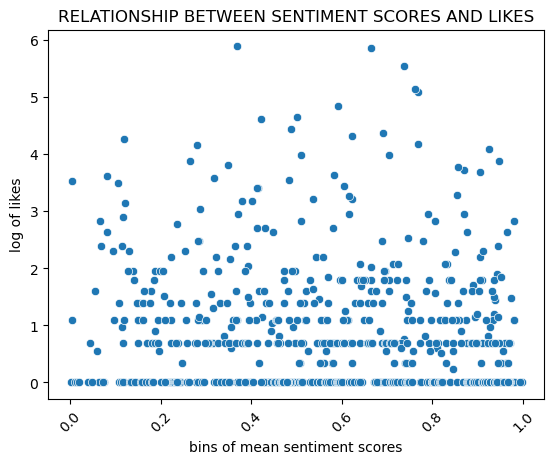

In [27]:

summary_df1 = df_cleaned.groupby('bin_sentiment_midpoint').agg({'log_likes':'mean'}).reset_index()
sns.scatterplot(x=abs(summary_df1['bin_sentiment_midpoint']), y=summary_df1['log_likes'])
plt.xticks(rotation=45)
plt.title('RELATIONSHIP BETWEEN SENTIMENT SCORES AND LIKES')
plt.xlabel('bins of mean sentiment scores')
plt.ylabel('log of likes')
plt.show()



Even here, it is clear that sentiment scores seem to have a horizontal relationship with likes. Again this brings into question the decision to use likes as a reach factor as it doesn't seem that people are liking the post on the basis of the intensity of the political sentiment expressed. However, the fact that they are liking a post related to Trump must mean that they agree or disagree with the contents of the post at some level i.e it reflects their political preferences.

**Just to be clear, a log scale was used for ease of visualizations**

# Project 2

## 2.1 Main Message

**Our data is mostly representative since there are no big differences between pro-trump and anti-trump twitter users when it comes to age and income. This makes it representative because the academic literature states that demographic trends in the US population is not a good predictor of political position which is the result we seek to find in our data.**

## 2.2: Maps and Interpretation

In this section we will merge income and age to our dataset and measure whether there are age and income differences between pro-trump(republican) and anti-trump(democrat) twitter users. 

Firstly, according to the MIT Election lab voter turnout is affected by 'income, older age, and being married'. This justifies our inclusion of Age and Income to our data. We will incorporate marriage status later. 

It is important for us to visualize whether there are political differences between age and income as it helps us with our preliminary assesment of whether our data is representative. Based on our peer review, demographic differences affect voter turnout but do not have a big impact on predicting political positions. Thus, if there are little to no differences between pro-trump and anti-trump twitter users by age and income, it hints that our data is representative.

In [28]:
# creating point geometry
df_cleaned['coordinates'] = list(zip(df_cleaned.long, df_cleaned.lat))
df_cleaned["coordinates"] = df_cleaned["coordinates"].apply(Point)


First we have created a new column coordinates which is in the 'point geometry' format which it makes it easier to build maps.

In [29]:
# creating a dataframe which only has data from the United states
df_only_US = df_cleaned[df_cleaned['country'] == 'United States of America']

We are interested in the US specifically and so we select only those tweets that come from US states.

**New dataset which features county level median incomes for the entire US**

In [30]:
df_county_income = pd.read_csv('US_county_income.csv')
df_county_income.head()

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M,Unnamed: 130
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,"Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to...","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to...",...,Margin of Error!!Nonfamily households!!Median ...,Estimate!!Nonfamily households!!Mean income (d...,Margin of Error!!Nonfamily households!!Mean in...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,NaN
1,0500000US01001,"Autauga County, Alabama",21559,366,6.2,1.4,4.6,1.2,12.3,2.0,...,3726,43328,3704,(X),(X),(X),(X),36.1,(X),NaN
2,0500000US01003,"Baldwin County, Alabama",84047,1143,5.2,1.0,4.8,0.7,7.7,0.8,...,2468,45788,3100,(X),(X),(X),(X),28.4,(X),NaN
3,0500000US01005,"Barbour County, Alabama",9322,338,14.6,2.6,7.6,1.5,18.4,2.2,...,2212,30876,5454,(X),(X),(X),(X),36.8,(X),NaN
4,0500000US01007,"Bibb County, Alabama",7259,299,11.0,3.3,7.1,2.8,10.5,2.7,...,3054,39792,10893,(X),(X),(X),(X),34.7,(X),NaN


The following dataset was received from the US census bureau. This is important data as we will want to estimate the median income of the twitter users whose sentiments we are measuring. We chose county because it is the smallest geographical denomination whose data we could find. The smaller the geography the better, because it implies that our estimate of the twitter users income (that is median income) has a higher likelihood of being the true income (as the number of people in a district are less than that of a state). 

In [31]:
numeric_column_names1 = {col: i for i, col in enumerate(df_county_income.columns)}
df_county_income = df_county_income.rename(columns = numeric_column_names1)
#df_county_income[24]

df_county_median_income = pd.DataFrame({'county':df_county_income[1],'median_income':df_county_income[24]})
df_county_median_income = df_county_median_income.drop(0)
df_county_median_income.head()

,county,median_income
1,"Autauga County, Alabama",57982
2,"Baldwin County, Alabama",61756
3,"Barbour County, Alabama",34990
4,"Bibb County, Alabama",51721
5,"Blount County, Alabama",48922


In [32]:
#we separate county into county and state
df_county_median_income[['county','state']] = df_county_median_income['county'].str.split(', ', expand = True)
df_county_median_income.head()

,county,median_income,state
1,Autauga County,57982,Alabama
2,Baldwin County,61756,Alabama
3,Barbour County,34990,Alabama
4,Bibb County,51721,Alabama
5,Blount County,48922,Alabama


We now bring the shapefile of US counties provided by the census bureau again. This will help us in *Map overlay* wherein we overlay these counties on our original dataset using the existing coordinates in our original dataset and matching it with the county shape file.

In [33]:
county_shapefile_path = 'tl_2020_us_county.shp'
gdf_county = gpd.read_file(county_shapefile_path)
gdf_county.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [34]:
#setting coordinate reference system to 4269 (check if its valid)
df_cleaned_gdf = gpd.GeoDataFrame(df_only_US, crs = 4269, geometry = 'coordinates')
df_cleaned_gdf.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,compound_score,norm_follower_count,weighted_sentiments_follower,norm_likes,weighted_sentiments_likes,log_follower,log_likes,bin_sentiment,bin_sentiment_midpoint,coordinates
0,2020-10-19 06:10:47,1.318072e+18,#DumpFascistTrump2020‼️ #Trump has #corrupted ...,1.0,1.0,Twitter for Android,29800708.0,📛End US Fascism📛,EndUSFascism,📛#AntiFascist\n📛#EndUSFascism\n📛#StopHateforPr...,...,-0.4215,0.000043,-0.000018,0.000086,-0.000036,5.624018,0.000000,"(-0.4216, -0.4212]",-0.421400,POINT (-110.95742 32.22876)
2,2020-10-15 20:25:43,1.316838e+18,PROGRAMMING NOTE: It’s a #Trump-free day! \n\n...,7.0,2.0,TweetDeck,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,0.0000,0.000183,0.000000,0.000600,0.000000,7.077498,1.945910,"(-4.59e-05, 0.0003533]",0.000154,POINT (-122.67419 45.52025)
3,2020-10-20 00:54:28,1.318355e+18,#trump’scompromised https://t.co/9W2PQUJYsj,1.0,1.0,Twitter for iPhone,801558991.0,guy knoller,guyknoller1,Employment and labor attorney. Resist,...,0.3818,0.001195,0.000456,0.000086,0.000033,8.956222,0.000000,"(0.3816, 0.382]",0.381800,POINT (-112.07414 33.44844)
4,2020-10-19 23:10:54,1.318329e+18,It Official: the entire #Trump administration ...,1.0,0.0,Twitter Web App,799406750.0,John Michaels,TonerBuyer,World news sprinkled with sharp sarcastic comm...,...,-0.4767,0.000395,-0.000189,0.000086,-0.000041,7.850104,0.000000,"(-0.4771, -0.4767]",-0.476900,POINT (-104.98486 39.73924)
5,2020-10-20 08:06:05,1.318463e+18,This is 🔥 🔥💥💥🔥🔥\n\n#Vote him OUT⚡\n\nEND the C...,3.0,3.0,Twitter for Android,371229186.0,Jeremy Song,tezuma75,Je vous souhaite bonne chance. 🍀\n\n ...,...,0.0000,0.000199,0.000000,0.000257,0.000000,7.164720,1.098612,"(-4.59e-05, 0.0003533]",0.000154,POINT (-122.41991 37.77903)


Now we do the overlay

In [35]:
county_overlay_df = gpd.sjoin(df_cleaned_gdf,gdf_county,op="within")
county_overlay_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,2020-10-19 06:10:47,1.318072e+18,#DumpFascistTrump2020‼️ #Trump has #corrupted ...,1.0,1.0,Twitter for Android,29800708.0,📛End US Fascism📛,EndUSFascism,📛#AntiFascist\n📛#EndUSFascism\n📛#StopHateforPr...,...,H1,G4020,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574
113,2020-10-19 16:13:37,1.318224e+18,"Trump Calls Dr. Fauci ‘Disaster,’ Says He Woul...",11.0,5.0,Twitter for iPhone,790624550.0,Ryan Shead,RyanShead,#husband | #father | #advocate | #creator | #a...,...,H1,G4020,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574
501,2020-10-19 18:13:20,1.318254e+18,@khankiso I am proud as hell of my mayor. I wi...,38.0,4.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,H1,G4020,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574
916,2020-10-16 15:11:37,1.317121e+18,If #Trump had #Covid then I'm a ballerina!! An...,0.0,1.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,H1,G4020,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574
2950,2020-10-21 18:37:44,1.318985e+18,#Trump is grifting &amp; money laundering that...,2.0,0.0,Twitter Web App,22275767.0,Ann Marie Hoff,Annimallover,"Follow on Instagram: Samson_Speaks\nAuthor, Ar...",...,H1,G4020,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574


The next step would be to merge the median income per county data with our original dataset. This can be done using 'counties' and 'state' as the unique identifier. This is required, as some counties have the same name across states.

In [36]:
# merging median income county with county merged
county_merged_df = pd.merge(county_overlay_df,df_county_median_income, left_on=["NAMELSAD",'state'], right_on=["county",'state'])
county_merged_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,county,median_income
0,2020-10-19 06:10:47,1.318072e+18,#DumpFascistTrump2020‼️ #Trump has #corrupted ...,1.0,1.0,Twitter for Android,29800708.0,📛End US Fascism📛,EndUSFascism,📛#AntiFascist\n📛#EndUSFascism\n📛#StopHateforPr...,...,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023
1,2020-10-19 16:13:37,1.318224e+18,"Trump Calls Dr. Fauci ‘Disaster,’ Says He Woul...",11.0,5.0,Twitter for iPhone,790624550.0,Ryan Shead,RyanShead,#husband | #father | #advocate | #creator | #a...,...,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023
2,2020-10-19 18:13:20,1.318254e+18,@khankiso I am proud as hell of my mayor. I wi...,38.0,4.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023
3,2020-10-16 15:11:37,1.317121e+18,If #Trump had #Covid then I'm a ballerina!! An...,0.0,1.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023
4,2020-10-21 18:37:44,1.318985e+18,#Trump is grifting &amp; money laundering that...,2.0,0.0,Twitter Web App,22275767.0,Ann Marie Hoff,Annimallover,"Follow on Instagram: Samson_Speaks\nAuthor, Ar...",...,536,46060,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023


**Now that we have added income, we also want to merge age by county level and so we procure county-level median age using US census data**

In [37]:
#loading county age
df_county_age = pd.read_csv('county_age_data.csv')
numeric_column_names2 = {col: i for i, col in enumerate(df_county_age.columns)}
df_county_age = df_county_age.rename(columns = numeric_column_names2)


In [38]:
df_county_age[64]
df_county_median_age = pd.DataFrame({'county':df_county_age[1], 'median_age':df_county_age[64]})
df_county_median_age = df_county_median_age.drop(0)
df_county_median_age[['county','state']] = df_county_median_age['county'].str.split(', ', expand = True)
df_county_median_age.head()

,county,median_age,state
1,Autauga County,38.6,Alabama
2,Baldwin County,43.2,Alabama
3,Barbour County,40.1,Alabama
4,Bibb County,39.9,Alabama
5,Blount County,41.0,Alabama


We merge the data as before, using county and state as unique identifiers.

In [39]:
county_merged_df = pd.merge(county_merged_df,df_county_median_age, left_on=["NAMELSAD",'state'], right_on=["county",'state'])
county_merged_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,county_x,median_income,county_y,median_age
0,2020-10-19 06:10:47,1.318072e+18,#DumpFascistTrump2020‼️ #Trump has #corrupted ...,1.0,1.0,Twitter for Android,29800708.0,📛End US Fascism📛,EndUSFascism,📛#AntiFascist\n📛#EndUSFascism\n📛#StopHateforPr...,...,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023,Pima County,38.7
1,2020-10-19 16:13:37,1.318224e+18,"Trump Calls Dr. Fauci ‘Disaster,’ Says He Woul...",11.0,5.0,Twitter for iPhone,790624550.0,Ryan Shead,RyanShead,#husband | #father | #advocate | #creator | #a...,...,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023,Pima County,38.7
2,2020-10-19 18:13:20,1.318254e+18,@khankiso I am proud as hell of my mayor. I wi...,38.0,4.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023,Pima County,38.7
3,2020-10-16 15:11:37,1.317121e+18,If #Trump had #Covid then I'm a ballerina!! An...,0.0,1.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023,Pima County,38.7
4,2020-10-21 18:37:44,1.318985e+18,#Trump is grifting &amp; money laundering that...,2.0,0.0,Twitter Web App,22275767.0,Ann Marie Hoff,Annimallover,"Follow on Instagram: Samson_Speaks\nAuthor, Ar...",...,None,A,23798597680,5112018,+32.1280380,-111.7836574,Pima County,55023,Pima County,38.7


 Now we have age and income merged with our data at a county level. 
 - An important assumption we are making is that **our twitter users represent the average/median resident in these counties i.e that their age and income will be the county median. This is our group assumption**

**Visualization**

**The objective of our visualization will be to determine whether there are discernible differences in characteristics like age
and income for pro and anti Trump voters.**

For this we must first create a categorical variable, namely position, where a positive sentiment score indicates pro-Trump whereas a negative sentiment score indicates anti-Trump. This is our **classification criterion**

In [40]:
#visualization preparation
#categorizing into pro and anti trump
df_scatterplot = pd.DataFrame({'sentiment_scores':county_merged_df['compound_score'].astype(float), 'age':county_merged_df['median_age'].astype(float), 'income':county_merged_df['median_income'].astype(float)})
def position(x):
    positions = []
    for i in x:
        if i < 0:
            positions.append('anti-trump')
        elif i > 0:
            positions.append('pro-trump')
        else:
            positions.append('moderate')
    return positions

df_scatterplot['position'] = position(df_scatterplot['sentiment_scores'])
df_scatterplot['position'].astype('category')

0        anti-trump
1          moderate
2          moderate
3         pro-trump
4         pro-trump
            ...    
13288     pro-trump
13289    anti-trump
13290    anti-trump
13291    anti-trump
13292      moderate
Name: position, Length: 13293, dtype: category
Categories (3, object): ['anti-trump', 'moderate', 'pro-trump']

This visualization will determine whether sentiment scores can be used as a proxy for political position. If it can be used (shows that there are demographic differences between trump and non-trump supporters) it implies that the twitter data is somewhat representative of real voter preferences (as partisanship is known to vary relative to demographic variables). If it does not show the above result it may hint towards the unrepresentativeness of our data and the potential need for post-stratification for the sake of generalizability. 

First lets us look at how age and income vary based on political position.

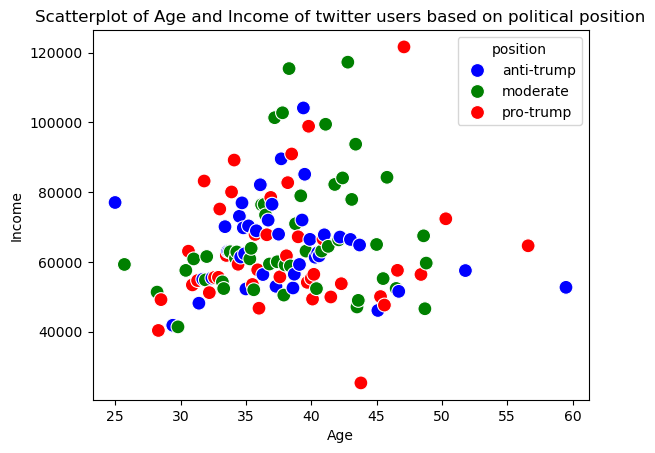

In [41]:
df_scatterplot['bin_age'] = pd.cut(df_scatterplot['age'], bins=10000)  # Adjust the number of bins as needed
df_scatterplot['bin_midpoint_age'] = df_scatterplot['bin_age'].apply(lambda x: x.mid).astype(float)
summary_df_age =df_scatterplot.groupby('bin_midpoint_age').agg({'income':'mean'}).reset_index()
custom_palette = {'pro-trump': 'red', 'anti-trump': 'blue', 'moderate': 'green'}
#sns.scatterplot(x = df_scatterplot['age'], y=df_scatterplot['income'], hue = df_scatterplot['position'], palette='Set1', s=100)
sns.scatterplot(x = summary_df_age['bin_midpoint_age'], y=summary_df_age['income'], hue = df_scatterplot['position'], palette=custom_palette, s=100)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatterplot of Age and Income of twitter users based on political position')
plt.show()


Since this is not entirely clear, let us plot individually.

*Red is for pro-trump which is a republican colour*

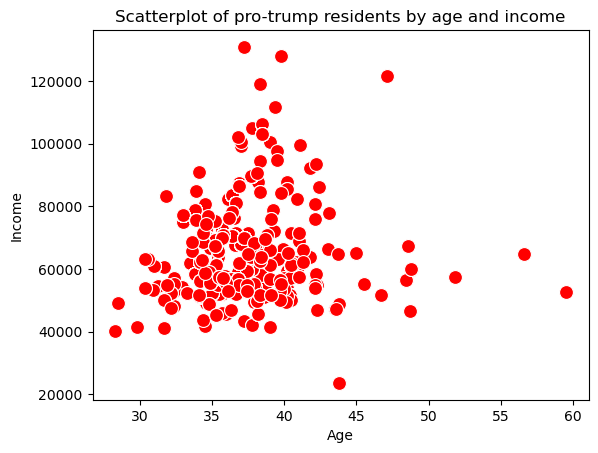

In [42]:
#pro-trump scatterplot age-income
category_to_visualize = 'pro-trump'
x_filtered = [df_scatterplot['age'][i] for i in range(len(df_scatterplot['age'])) if df_scatterplot['position'][i] == category_to_visualize]
y_filtered = [df_scatterplot['income'][i] for i in range(len(df_scatterplot['income'])) if df_scatterplot['position'][i] == category_to_visualize]
sns.scatterplot(x = x_filtered, y=y_filtered, color='red',s=100)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatterplot of pro-trump residents by age and income')
plt.show()

there seems to be some outliers, high income people aroun the age 35-40 and some old twitter users aged 60. There is also an individual with low median income at about $22,000. This may have an effect on our later estimates, but are not a significant problem as of yet.

*Blue is for anti trump which is the democrat colour*

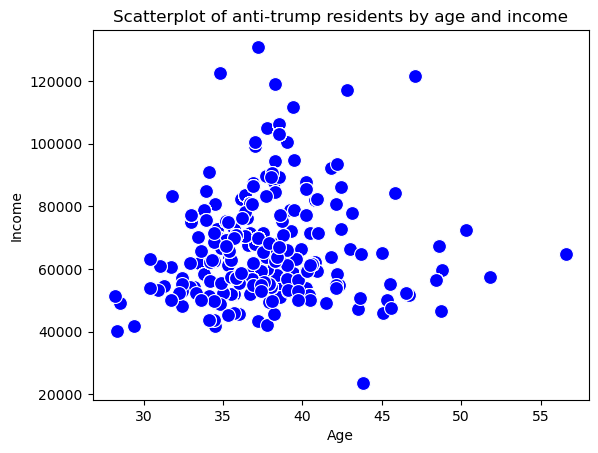

In [43]:
#anti-trump scatter plot age-income
category_to_visualize1 = 'anti-trump'
x_filtered1 = [df_scatterplot['age'][i] for i in range(len(df_scatterplot['age'])) if df_scatterplot['position'][i] == category_to_visualize1]
y_filtered1 = [df_scatterplot['income'][i] for i in range(len(df_scatterplot['income'])) if df_scatterplot['position'][i] == category_to_visualize1]
sns.scatterplot(x = x_filtered1, y=y_filtered1, color='blue',s=100)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatterplot of anti-trump residents by age and income')
plt.show()

From these plots, it does not seem that there is much variation in age or income group when it comes to pro-Trump and anti-Trump supporters. This hints at there being no significant variation in political position relative to demographic variables. Let us confirm this using a histogram.

## Main Visualization

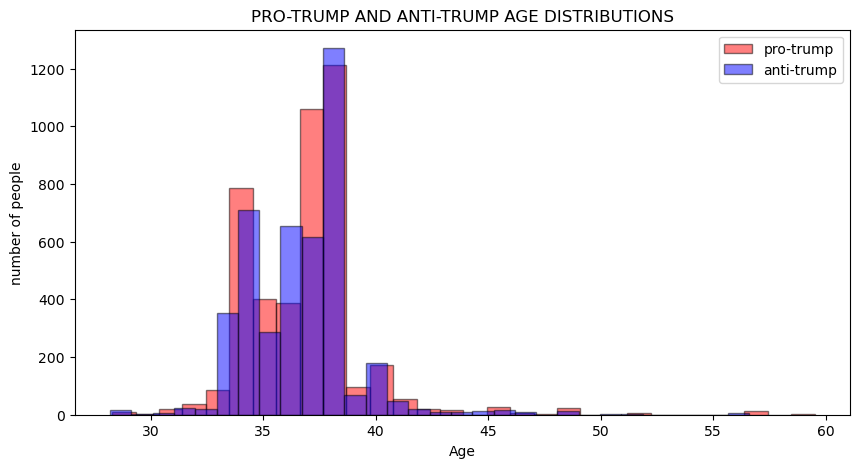

In [44]:
# histogram for pro-trump and anti-trump age distributions
plt.figure(figsize=(10, 5))

# Plot histogram for data1
plt.hist(x_filtered, bins=30, color='red', edgecolor = 'black',alpha=0.5, label='pro-trump')

# Plot histogram for data2
plt.hist(x_filtered1, bins=30, color='blue', edgecolor = 'black',alpha=0.5, label='anti-trump')
plt.xlabel('Age')
plt.ylabel('number of people')
plt.title('PRO-TRUMP AND ANTI-TRUMP AGE DISTRIBUTIONS')
plt.legend()
plt.show()

This shows that the pro and anti Trump age distributions are almost the same. This suggests that there are no significant differences age-wise between pro and anti Trump positions *as per our classification criterion*. 

There are some odd patterns like age 37 twitter users being relatively more pro-trump than anti-trump, whereas people of the age of 36 are relatively more anti-trump. It seems that around the age of 34 to 35 that we have a similar pattern with relatively more pro-trump twitter users. These are likely random patterns or a result of other variables.


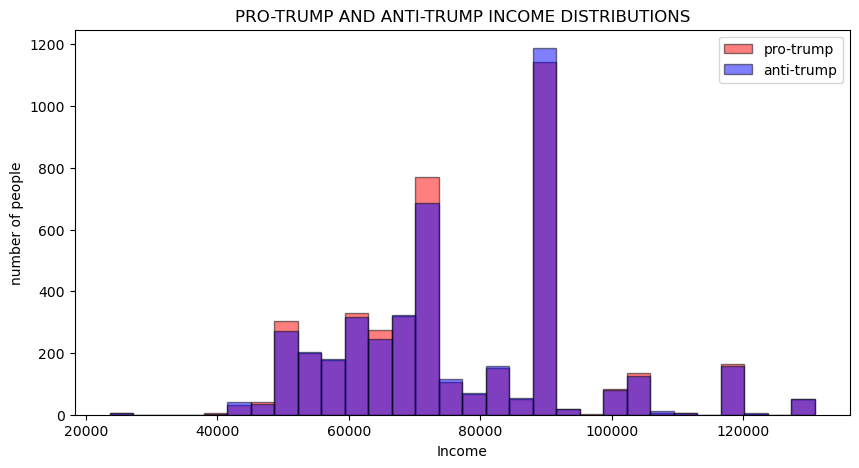

In [45]:
# trump and anti-trump income distributions
plt.figure(figsize=(10, 5))

# Plot histogram for data1
plt.hist(y_filtered, bins=30, color='red',edgecolor = 'black', alpha=0.5, label='pro-trump')

# Plot histogram for data2
plt.hist(y_filtered1, bins=30, color='blue',edgecolor = 'black', alpha=0.5, label='anti-trump')
plt.xlabel('Income')
plt.ylabel('number of people')
plt.title('PRO-TRUMP AND ANTI-TRUMP INCOME DISTRIBUTIONS')
plt.legend()
plt.show()

Income differences between trump and non-trump positions seem to be even less significant. There are slightly more pro-trump people aroud the $70,000 to $80,000 income level with other patterns in other income groups. These are again, likely random patterns. Thus, there are three potential takeaways from this:

**reflections**

- Our sample of twitter data is representative of the population voter preference as trends do not significantly affect political position. (assuming our classification criterion and group assumptions are correct)

It could be that our classification criterion is incorrect or that our group assumptions are false. This classification criterion will be statistically evaluated later on. There might be some holes in our group assumptions considering the outliers we see in the income and age scatterplot.

## Maps

In this section, we will look to create three maps for sentiment scores, income, and age. This will be used to measure the level of polarization in our tweets. **This is important to understand the distribution of polarized opinions across the US states and how they may affect voter turnout geographically**.

Now with our dataframe, we will turn our latitude and longitude into a format which gives us the point coordinates of each tweet.

Now that we have our new data frame, we will read in the US country shapefile from the US census bureau.

In [46]:
#reading the US country shapefile from US census data
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")



In [47]:
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


Instead plotting sentiment scores of tweets in specific locations across the country, we will create a dataframe with only states from the US(df_only_US). then we create another dataframe with two columns, US states and the sentiment scores. At this point we have the same number of rows as before but with only state and sentiment score as columns. The goal of our map is to visualize the **average sentiment score per state** so as to understand regional variation in pro and anti trump sentiments. Since the sentiment score distribution is fairly symmetric, average sentiment scores is a fair measure to use. 

To construct this map, we group by unique US state values and calculate the average sentiment score per state and assign it to result.

In [48]:


#Creating a new dataframe which consists only of US states and compound scores per observation
df_small = pd.DataFrame({'state': df_only_US['state'], 'compound score': df_only_US['compound_score']})



#creating a new dataframe which outputs every unique US state and the average sentiment score(compound score) for tweets in that
#state
result = df_small.groupby('state')['compound score'].mean().reset_index()
result.head()


,state,compound score
0,Alabama,-0.040107
1,Alaska,0.082209
2,Arizona,0.018133
3,Arkansas,0.093225
4,California,0.020611


Now, we will merge our dataframe with unique states and average sentiment scores to the US shapefile. We merge on the column 'state'. This merge will give us the point coordinates for each US state helping us apply the sentiment score color scale to that respective state spatially.

In [49]:
#merging the result dataframe with the state datafame (census file) on 'state' so as to get the geometry/coordinates of each
#state
result1 = pd.merge(result,state_df, left_on = 'state', right_on = 'NAME' )
result1_geo = gpd.GeoDataFrame(result1, geometry="geometry")
result1_geo['compound score'] = round(result1_geo['compound score'], 2)

result1_geo.head()

,state,compound score,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,Alabama,-0.04,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,Alaska,0.08,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,Arizona,0.02,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,Arkansas,0.09,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
4,California,0.02,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."


Now, we plot the map.

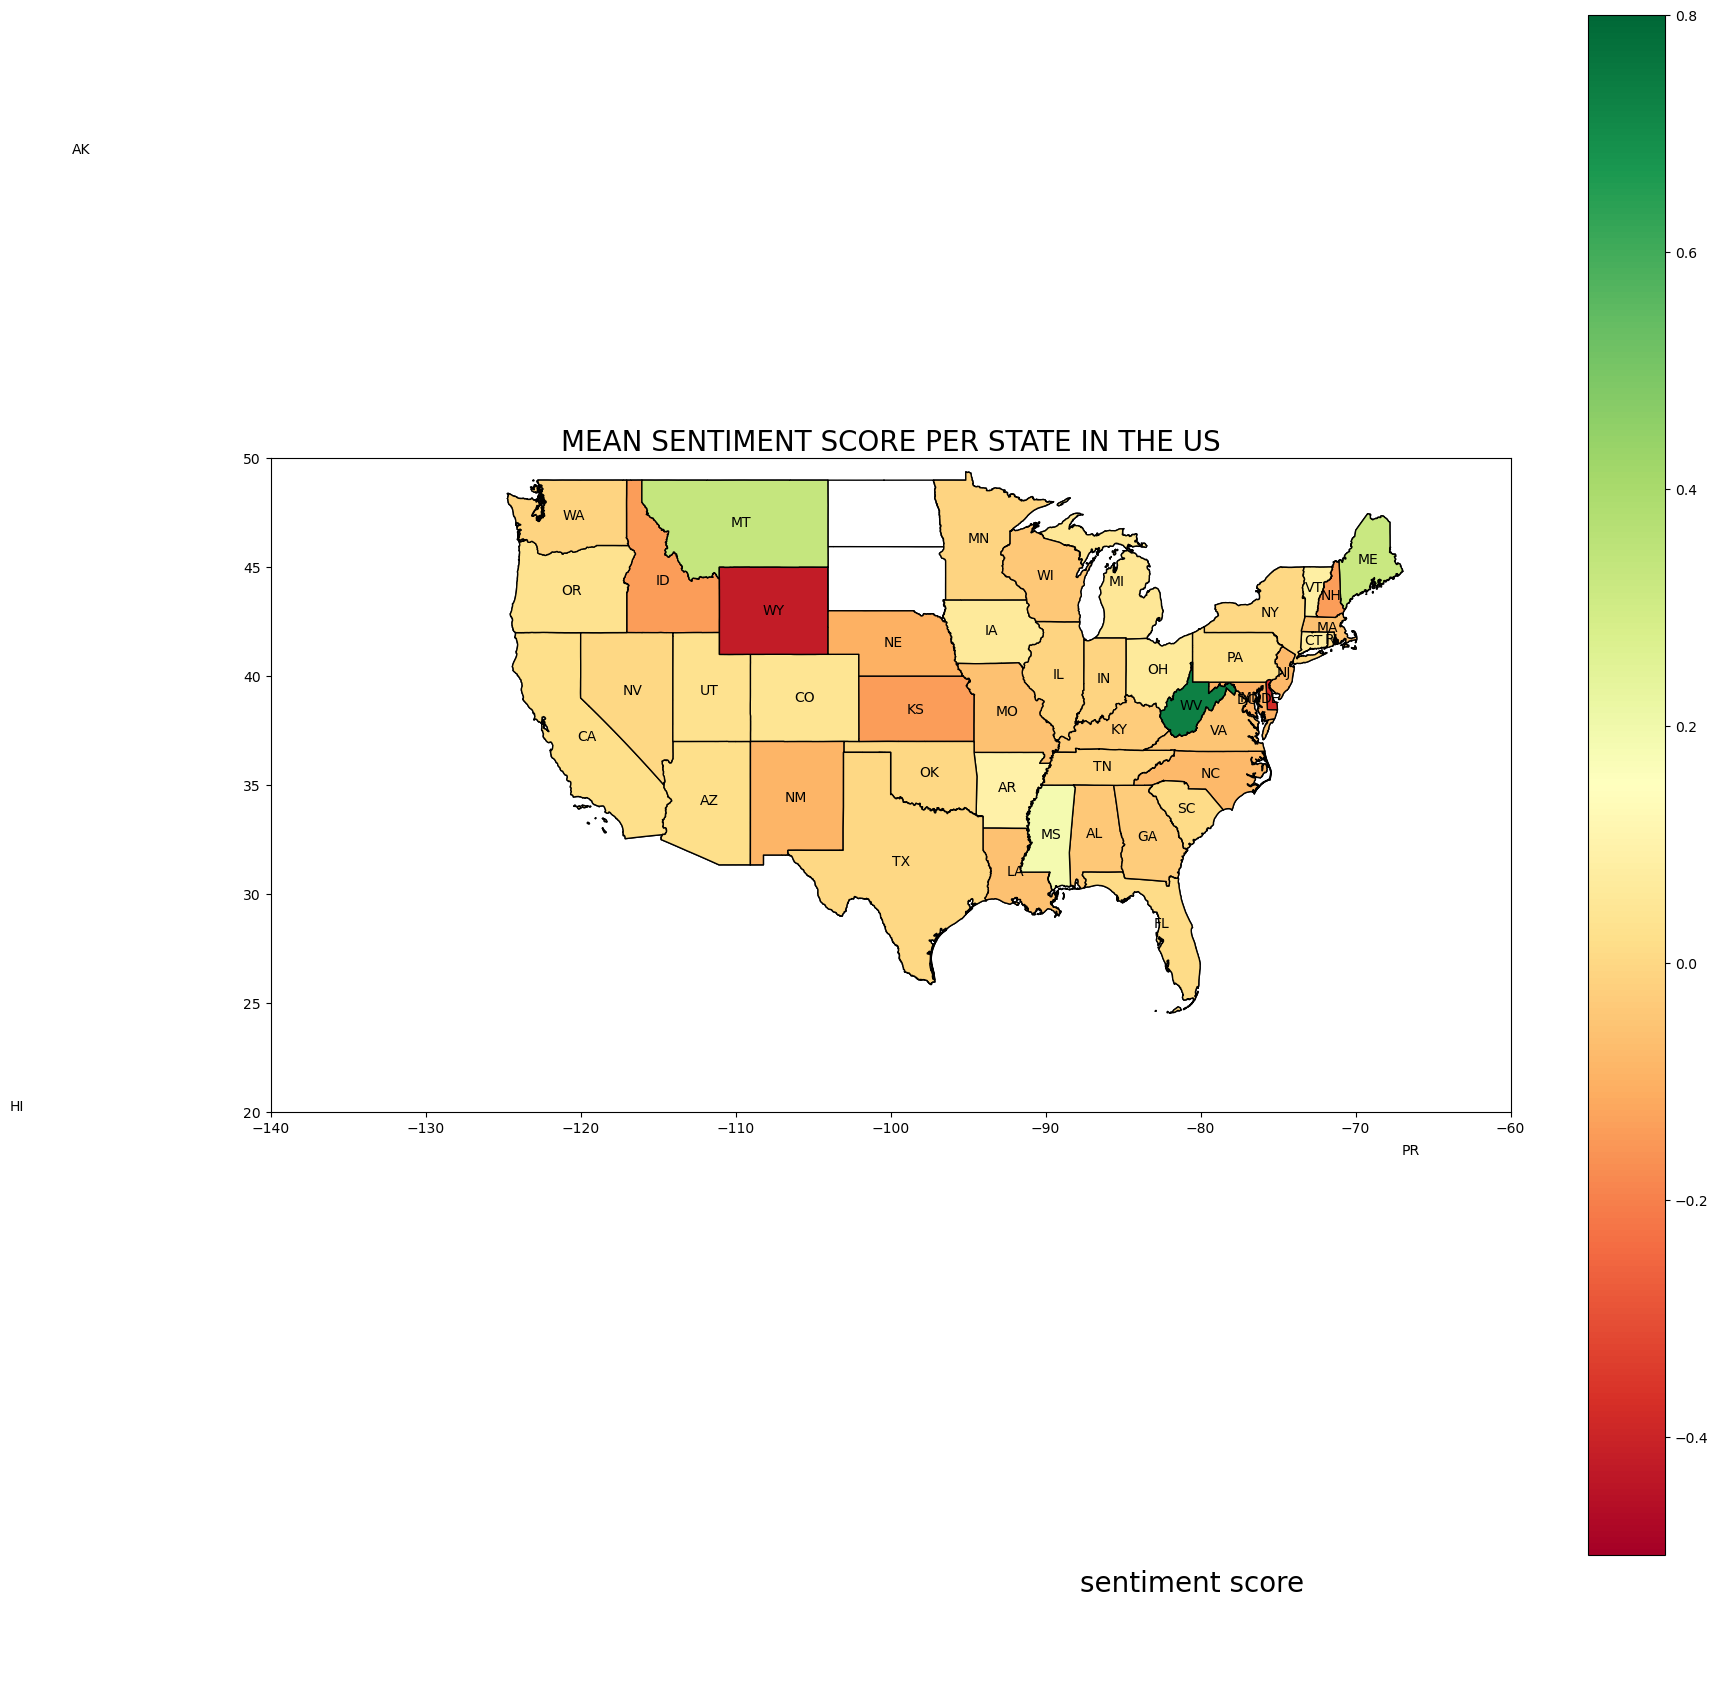

In [50]:
#plotting the density map
#'RdBu_r'
#from matplotlib.colors import Normalize
#for x, y, label in zip(state_df.geometry.centroid.x, state_df.geometry.centroid.y, state_df['NAME']):
    #plt.text(x, y, label, fontsize=4, ha='center', va='center', color='black')
fig, gax = plt.subplots(figsize=(20,20))
gax.set_xlim([-140,-60])
gax.set_ylim([20,50])
#norm = Normalize(vmin=-0.5, vmax=0.8)
state_df.plot(ax=gax, edgecolor="black", color="white")
result1_geo.plot(
    ax=gax, edgecolor='black', column='compound score', legend=True, cmap='RdYlGn',
    vmin=-0.5, vmax=0.8 #range of your column value for the color legend
)

for x, y, label in zip(result1_geo.geometry.centroid.x, result1_geo.geometry.centroid.y, result1_geo['STUSPS']):
    gax.text(x, y, label, fontsize=10, ha='center', va='center')

gax.set_title('MEAN SENTIMENT SCORE PER STATE IN THE US', fontsize = 20)
gax.annotate('sentiment score',xy=(0.54, 0.05),  xycoords='figure fraction', fontsize = 20)
plt.show()

As per the map, tweets from the west and south seem generally neutral about Trump if not slightly negative on average. The state of Missisipi in the south is light green, surrounded by orange states. This suggests that Missisipi is on average a bit more pro-Trump in its tweets. The midwest is seemingly a bit more Anti-trump on average as they have a darker orange colour. The only state with tweets that holds very negative sentiments towards Trump is Wyoming and Delaware. West Virginia is shown on average to be very pro-trump in its tweets. The same goes with Montana and Maine.

These results seem to be consistent with the sentiment score distribution that we plotted before. The interquartile range of our sentiment scores is from -0.3 to 0.3 which means that 50% of the data shows fairly moderate sentiments. If there seems to be more negative sentiment averages this could be a result of negative sentiment outliers in the state specific tweets. Moreover, some states may be over or under represented in terms of how many tweets they have. It could just be that twitter users are genrally more anti-trump or that the population in general is more anti trump in 2020. This also affects the accuracy of their individual mean sentiment score estimates. *These drawbacks will be accounted for in future projects*.

Thus, the presence of potential outliers in an otherwise centred sentiment score distribution may hint at specific twitter users and handles. This could potentially skew our estimate of how sentiments impact voter turnout.

Now we plot a map for our variable income. This is important as it gives us insight into how income differences across US states may affect voter turnout. Since there is evidence that income also influences voter turnout, this will help us understand how voter turnout may vary in relation to income on top of sentiment scores. per state. 

Moreover, we can check the correlation between income and sentiments. Based on our visualizations, there are no real differences between pro and anti trump twitter users based on age and income. However, comparing income with sentiment scores directly provides us with more of a scale to work with as opposed to a binary categorical variable. 

In [51]:
#geo object for income map
county_merged_df['median_income'] = county_merged_df['median_income'].astype(float)
df_state_income = pd.DataFrame({'state':county_merged_df['state'], 'income':county_merged_df['median_income']})
result_state_income = df_state_income.groupby('state')['income'].mean().reset_index()
result_state_income1 = pd.merge(result_state_income, state_df, left_on='state',right_on='NAME')
result_state_income1_geo = gpd.GeoDataFrame(result_state_income1, geometry='geometry')
result_state_income1_geo.head()

,state,income,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,Alabama,53316.250000,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,Alaska,84813.000000,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,Arizona,64280.990654,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,Arkansas,52323.750000,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
4,California,89070.132829,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."


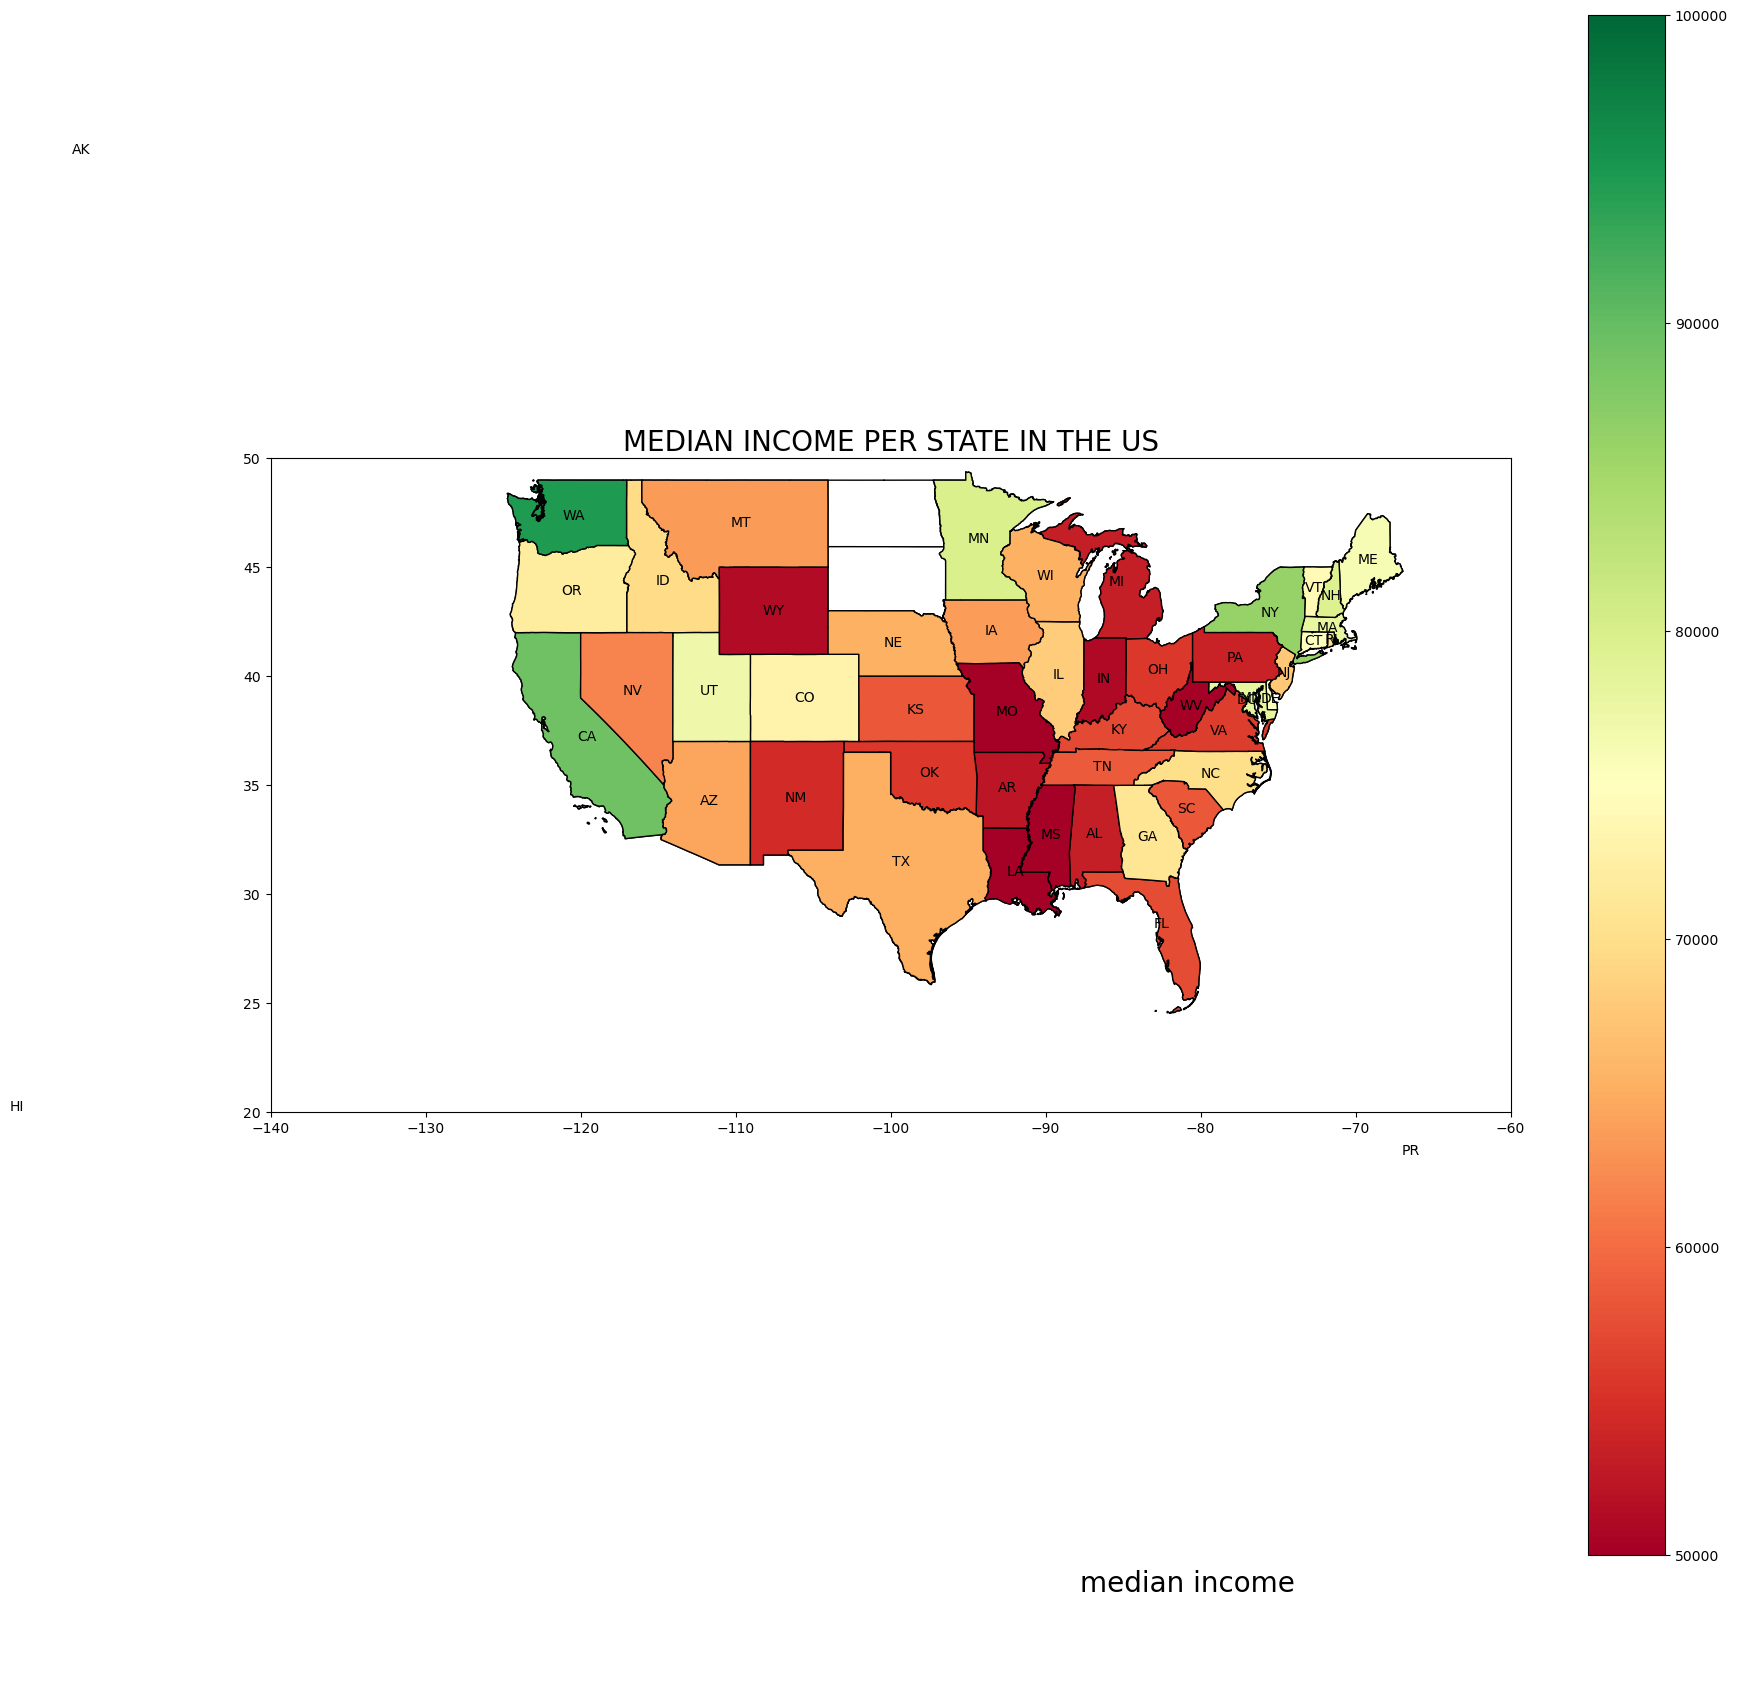

In [52]:
#Map for income
fig, gax = plt.subplots(figsize=(20,20))
gax.set_xlim([-140,-60])
gax.set_ylim([20,50])
#norm = Normalize(vmin=-0.5, vmax=0.8)
state_df.plot(ax=gax, edgecolor="black", color="white")
result_state_income1_geo.plot(
    ax=gax, edgecolor='black', column='income', legend=True, cmap='RdYlGn',
    vmin=50000, vmax=100000 #range of your column value for the color legend
)
for x, y, label in zip(result1_geo.geometry.centroid.x, result1_geo.geometry.centroid.y, result1_geo['STUSPS']):
    gax.text(x, y, label, fontsize=10, ha='center', va='center')
gax.set_title('MEDIAN INCOME PER STATE IN THE US', fontsize = 20)
gax.annotate('median income',xy=(0.54, 0.05),  xycoords='figure fraction', fontsize = 20)
plt.show()

When we observe this map, we see some interesting connections.

Firstly, Wyoming which is the most-anti trump state as per our data is also a state with a very low median income relative to other states. This does not necessarily mean anything as West Virginia which also has a low median income relative to the other states is a highly pro-trump state. Thus, it seems that at the extremes income does not affect polarization in any direct way. The midwest states do have a relatively low median income, also being slightly anti-trump states based on sentiments. However, considering our extreme cases, it does not imply a strong connection. 

Thus, we could say that visually we could not determine any connection between income and sentiments which is good as it may suggest low multicollinearity. If at all income affects voter turnout significantly, we would likely see an impact in states like california, washington, Wyoming etc where the median income is on the extreme. However, considering the wealth distribution of states like california and Washington, median income may give us biased estimates. This is because the most valuable tech companies reside in California and Washington with billionaires like Bill gates, Larry page etc residing there. 

*We may have a slight bias with our twitter data*, where our twitter users may be young, relatively low income users. This is because wealthier people may not express extreme sentiments on twitter because they have other channels by which they can express their political views. 



We will also look at the map for age, to understand if age correlates with sentiments or income. Moreover, this will give us a preliminary understanding of the potential effect on voter turnout.

In [53]:
#geo object for age map
county_merged_df['median_age'] = county_merged_df['median_age'].astype(float)
df_state_age = pd.DataFrame({'state':county_merged_df['state'], 'age':county_merged_df['median_age']})
result_state_age = df_state_age.groupby('state')['age'].mean().reset_index()
result_state_age1 = pd.merge(result_state_age, state_df, left_on='state',right_on='NAME')
result_state_age1_geo = gpd.GeoDataFrame(result_state_age1, geometry='geometry')
result_state_age1_geo.head()

,state,age,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,Alabama,36.965000,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,Alaska,33.900000,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,Arizona,37.040187,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,Arkansas,35.075000,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
4,California,37.042081,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."


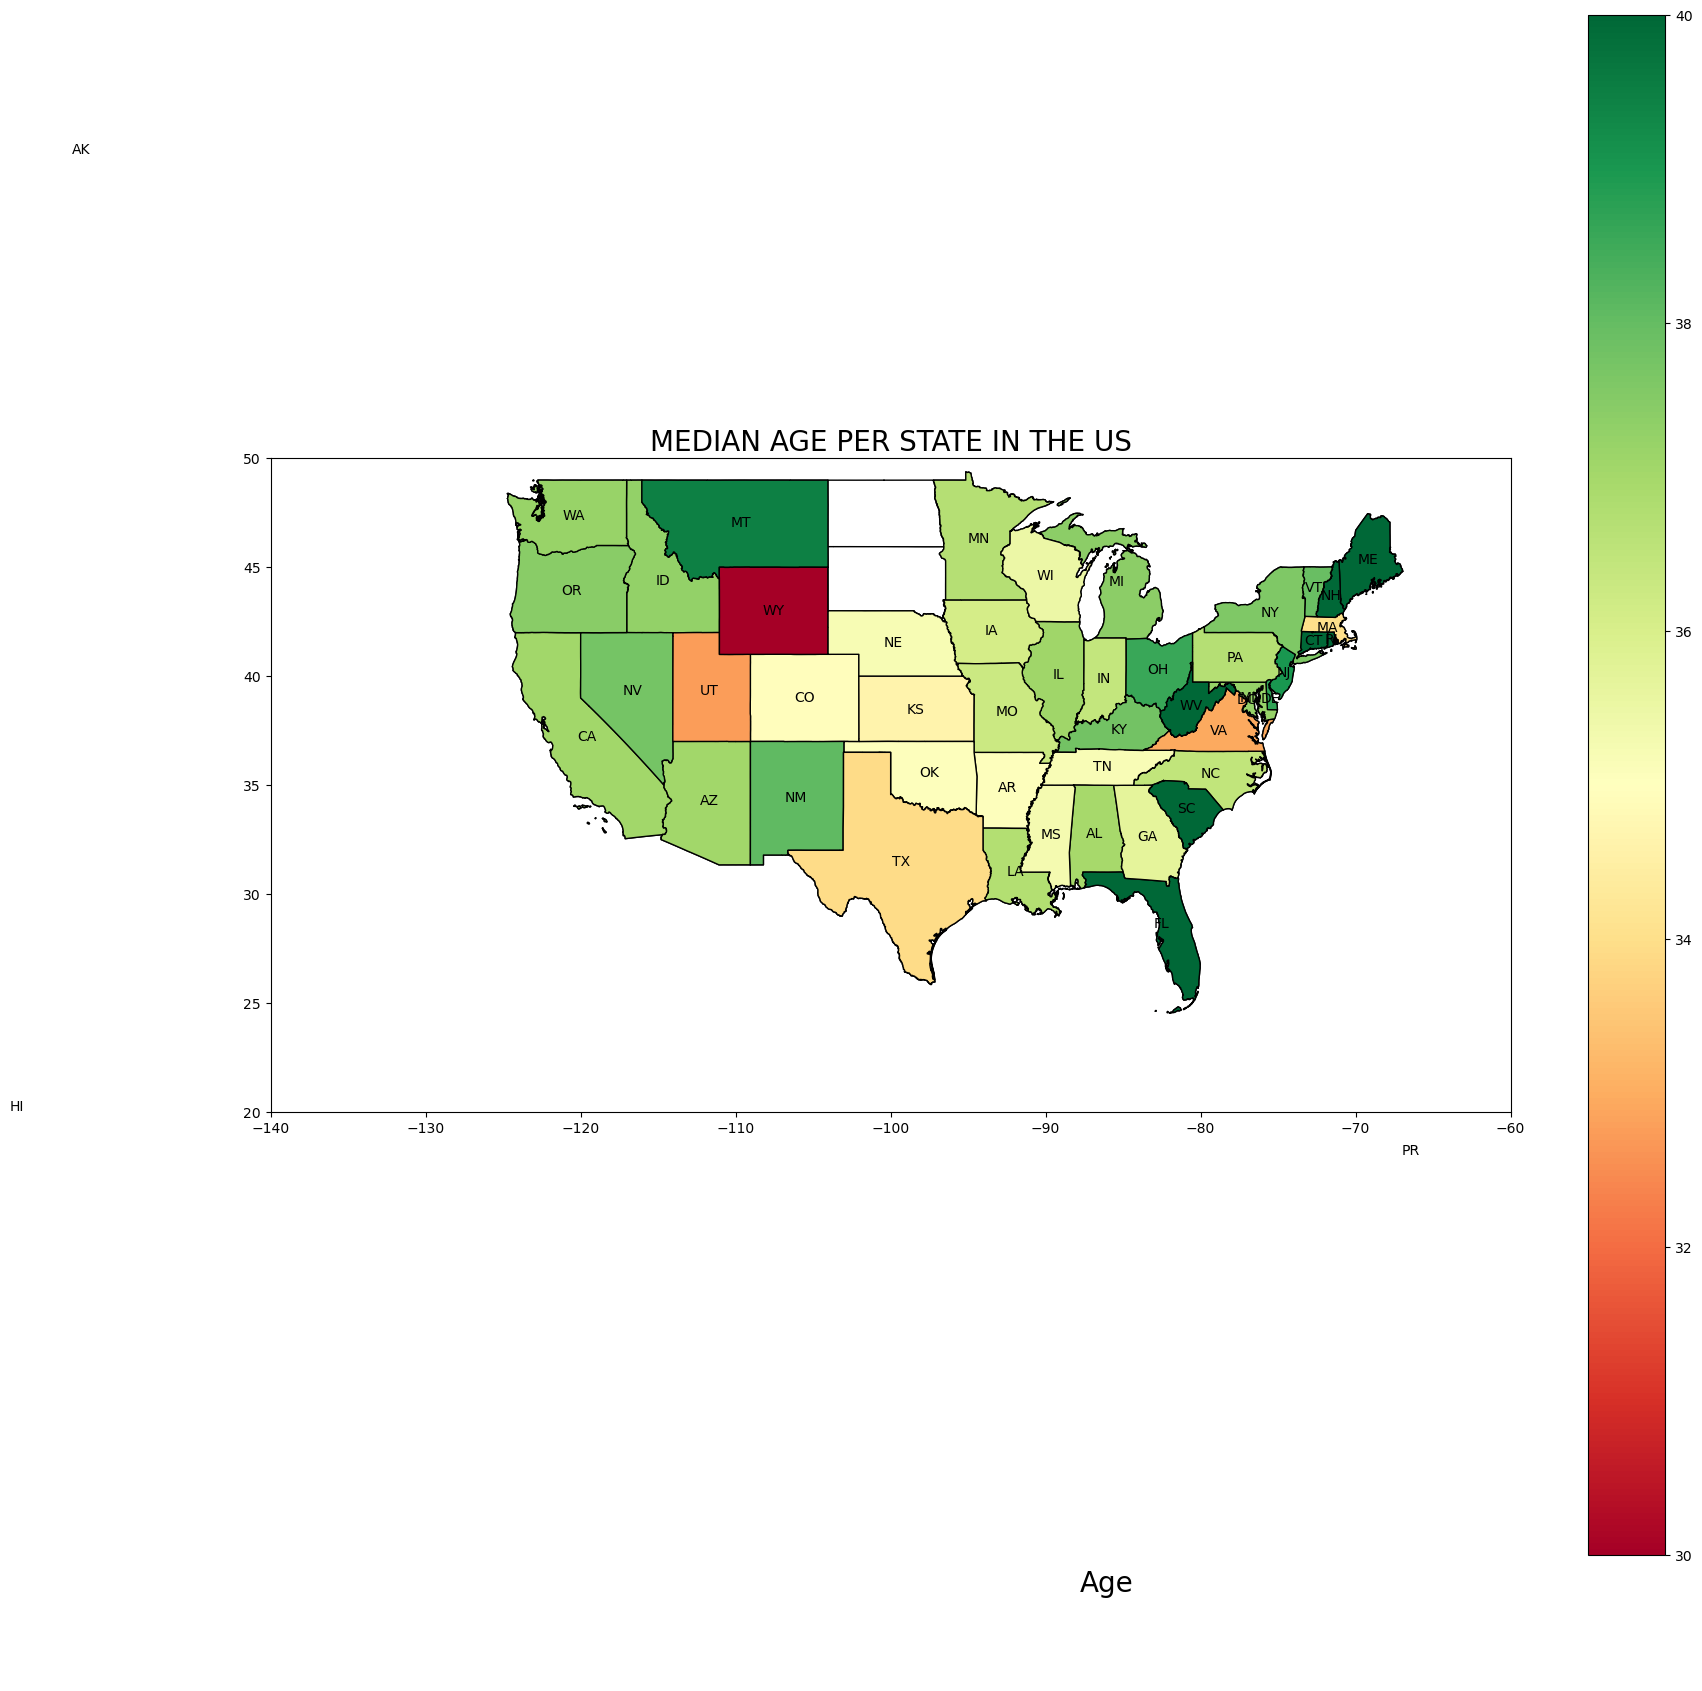

<Figure size 640x480 with 0 Axes>

In [54]:
#Map for age
fig, gax = plt.subplots(figsize=(20,20))
gax.set_xlim([-140,-60])
gax.set_ylim([20,50])
#norm = Normalize(vmin=-0.5, vmax=0.8)
state_df.plot(ax=gax, edgecolor="black", color="white")
result_state_age1_geo.plot(
    ax=gax, edgecolor='black', column='age', legend=True, cmap='RdYlGn',
    vmin=30, vmax=40 #range of your column value for the color legend
)
for x, y, label in zip(result1_geo.geometry.centroid.x, result1_geo.geometry.centroid.y, result1_geo['STUSPS']):
    gax.text(x, y, label, fontsize=10, ha='center', va='center')
gax.set_title('MEDIAN AGE PER STATE IN THE US', fontsize = 20)
gax.annotate('Age',xy=(0.54, 0.05),  xycoords='figure fraction', fontsize = 20)
plt.show()
plt.savefig('map_age.jpg', format='jpeg')

 Wyoming again presents itself as an odd case with one of the relatively lowest median ages, median incomes being a heavily anti-trump state. West Virginia this time is a state with a relatively high median age, also having a very pro-trump position. This may suggest that states with generally older populations support Trump whereas relatively younger states are against Trump.

Then again this may not be the best conclusion as states like Florida and South Carolina seem to have relatively very old populations but are still somehwat anti-trump. This again brings back the possibility of outliers influencing our estimates. Moreover, the west coast having a relatively old population are also somehwat anti-trump. 

One possible explanation is that twitter data consists of mostly young people which is what gives the anti-trump bias. This would explain why states with relatively older populations also seem to be anti-trump. Older people may not be very active or use Twitter for political expression as much as young people.

# Project 3

## 3.1 Potential data to scrape

Until now we have considered two variables apart from polarization that affect voter turnout, that is age and income. Based on the literature, other social characteristics like marriage status, education level, and race also play a role in determining voter turnout. Thus, in order to obtain county level statistics which display this variable, the American Community Survey(ACS) data provides exactly this. More specifically, ACS is conducted by the US census bureau which also provides the facility of accessing this data using API's. Thus, data on county level marriage status, education level, and race can be scraped using API based web scraping. This can then be merged with out data on the county level.

the following is the page for ACS data where we can scrape from: https://www.census.gov/programs-surveys/acs/data.html


## 3.2 Potential challenges

some potential challenges with this include acquiring api details and then scraping data for all county-levels in the United states. This is naturally a very large chunk of data.

Thus, our first challenge is time as there is a lot of data to scrape. This is a challenge and is not immediately doable. As per the census bureau themselves, there is an overwhelming amount of data to scrape which can make it difficult for novice's to use. Moreover, the census bureau has many video tutorials (almost 1 hour long) to show how the api can be used to access the data.

Therefore, for the future I must review the video tutorials and get a good grasp of how the API works before I can commence the scraping. Moreover, there are likely other exogenous control variables that influence voter turnout so I may end up scraping data for more variables. 

## 3.3 Scraping data from a website

Since scraping the data mentioned above will be a challenge, we will look into web scraping data on the results of the 2020 US elections from Wikipedia. 

First we import our library from which we can send requests to our wikipedia webpage of interest.

In [55]:
import requests

The following chunk of data includes the url of our wikipedia webpage which we send a request to using the requests.get function, storing it in our variable response. Then, we check to see whether the request was succesful using status code.
200 means that the link was made succesfully and that we can access the website data.

In [56]:
# Scraping wiki table on US election results
election_results_url = 'https://en.wikipedia.org/wiki/2020_United_States_elections'
response = requests.get(election_results_url)
response.status_code

200

We then import the Beautfiful Soup library. This library helps us parse through HTML based documents which our website is. This is important as it allows us to acquire data by referencing the HTML tag and class type of our data.

In [57]:
from bs4 import BeautifulSoup
soup_results = BeautifulSoup(response.content)



After having created the beautiful soup object, we now use the find function to access the table in the website which shows the results of the elections. The HTML tag for the table is 'table' whereas the class of the table is 'wikitable sortable plainrowheaders'. This will give us each row of the table, starting from the column names.

In [58]:
table = soup_results.find('table','wikitable sortable plainrowheaders')



Within the table, we are interested in data with the tag 'tr' which represents the body of the table i.e the data on the election results

In [59]:
election_results = table.find_all('tr')


Now comes the important part. We essentially want the statewise breakdown of presidential election winners which we wish to store in our dataframe Election_2020_results.
To do this, we will run a loop over our election results from row 2 to 49 (which features all 50 US states).

In order to access state names, we will access objects with the 'th' HTML tag. We then apppend these state names to our states list, which we then add to the states column of our dataframe.

In order to access presidential election results, we run another for loop, accessing column 5 of the table so that we get only presidential election results. Moreover, the victor party of that state is an object of type 'td' which we extract and append to the list presidential_election_winner. We then store it in the presidential_election_winner column of our dataframe.

Then, we look at our data.


In [60]:
Election_2020_results = pd.DataFrame(columns = ['states', 'presidential_election_winner']) # Create an empty dataframe
states = []
presidential_election_winner = []

for row in election_results[2:52]:
    try:
        values = row.find_all('th')[0]
        states.append(values.text.strip()) 
    except:
        exit

Election_2020_results['states'] = states

for rowz in election_results[2:52]:
    try:
        valuez = rowz.find_all('td')[5]
        presidential_election_winner.append(valuez.text.strip())
        Election_2020_results['presidential_election_winner']= presidential_election_winner # Store it in the dataframe as a row
    except:
        exit

Election_2020_results['presidential_election_winner']= presidential_election_winner
# Print the first 5 rows of the dataframe
Election_2020_results
#presidential_election_winner[49]

,states,presidential_election_winner
0,Alabama,Rep
1,Alaska,Rep
2,Arizona,Dem
3,Arkansas,Rep
4,California,Dem
5,Colorado,Dem
6,Connecticut,Dem
7,Delaware,Dem
8,Florida,Rep
9,Georgia,Dem


This shows the first 5 observations which shows that we have constructed our dataframe as intended.

## 3.4 Visualizing the Scraped dataset

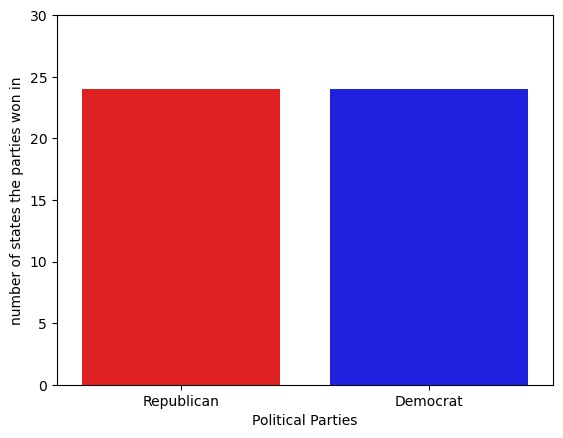

,parties,states_won
0,Republican,24
1,Democrat,24


In [61]:
#visualization
victory_scale = pd.DataFrame({'parties':['Republican','Democrat'], 'states_won':[sum(Election_2020_results['presidential_election_winner'] == 'Rep'),sum(Election_2020_results['presidential_election_winner'] == 'Dem')]})
colours = {'Republican':'red', 'Democrat':'blue'}
sns.barplot(x = 'parties', y='states_won', data = victory_scale, palette = colours)
plt.xlabel('Political Parties')
plt.ylabel('number of states the parties won in')
plt.ylim(0,30)
plt.show()
victory_scale

This barplot indicates that the Democrat party won 24 states and that the Republicans also won 24 states. However, some of our data for state winners had output like dem(k) and rep(I) which was not counted. Counting that it is 25-25 for both parties, it is the adding of electoral votes that spelled a victory for Biden.

The actual election result is important to us because we want to see how similar it is to our data's patterns. We assume our data to be representative of the political preferences of the population which is what allows for generalizability. This means, based on our classification criterion (sentiment score based) we have divided tweets into pro and anti-trump. We assume that

- Pro-trump is republican and ant-trump is democrat
- the mean sentiment score of each state is indicative of the political preference of that state

Thus, we can test whether the actual results match our data prediction of political position in order to gauge the representativeness of our data. This is crucial if we want to generalize twitter polarisation to be the political polarization of the population. One flaw is that our classification criterion may be incorrect. We will try and use some techniques later on to statistically evaluate our classification criterion.

the following is a variable we have already defined, with a glimpse of state wise mean sentiment scores

In [62]:
# state wise mean sentiment score
result.head()

,state,compound score
0,Alabama,-0.040107
1,Alaska,0.082209
2,Arizona,0.018133
3,Arkansas,0.093225
4,California,0.020611


Now, we do as before and calculate the political position of each state based on mean sentiment score. Again, negative sentiment scores imply anti-trump whereas positive implies pro-trump.

In [63]:
result['position'] = position(result['compound score'])
result.head()

,state,compound score,position
0,Alabama,-0.040107,anti-trump
1,Alaska,0.082209,pro-trump
2,Arizona,0.018133,pro-trump
3,Arkansas,0.093225,pro-trump
4,California,0.020611,pro-trump


Let us now modify our victory_scale dataframe to include this

In [64]:

victory_scale['states_won_sentiment_based'] = [sum(result['position']=='pro-trump'), sum(result['position']=='anti-trump')]
victory_scale


,parties,states_won,states_won_sentiment_based
0,Republican,24,23
1,Democrat,24,27


**Interpretation**

It seems that based on our classification criterion for twitter sentiments, democrat or anti-trump states were overestimated. However, considering that Biden won based on electoral voting means that *twitter was able to capture the popular sentiment to a degree when it comes to sentiment analysis*. Although our previous visualization shows that there are little to no demographic differences between pro and anti trump voters, it could be that there just aren't significant demographic differences between pro and non trump supporters. 


## 3.5 Adding a new dataset


In [65]:
df_new = pd.read_csv('county_statistics.csv')

In [66]:
df_new.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [67]:
merged_new_df= pd.merge(county_merged_df,df_new, left_on = 'NAME', right_on = 'county')
merged_new_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,2020-10-19 06:10:47,1.318072e+18,#DumpFascistTrump2020‼️ #Trump has #corrupted ...,1.0,1.0,Twitter for Android,29800708.0,📛End US Fascism📛,EndUSFascism,📛#AntiFascist\n📛#EndUSFascism\n📛#StopHateforPr...,...,2.3,3.6,4.8,24.5,433478.0,75.7,17.6,6.5,0.2,8.4
1,2020-10-19 16:13:37,1.318224e+18,"Trump Calls Dr. Fauci ‘Disaster,’ Says He Woul...",11.0,5.0,Twitter for iPhone,790624550.0,Ryan Shead,RyanShead,#husband | #father | #advocate | #creator | #a...,...,2.3,3.6,4.8,24.5,433478.0,75.7,17.6,6.5,0.2,8.4
2,2020-10-19 18:13:20,1.318254e+18,@khankiso I am proud as hell of my mayor. I wi...,38.0,4.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,2.3,3.6,4.8,24.5,433478.0,75.7,17.6,6.5,0.2,8.4
3,2020-10-16 15:11:37,1.317121e+18,If #Trump had #Covid then I'm a ballerina!! An...,0.0,1.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,2.3,3.6,4.8,24.5,433478.0,75.7,17.6,6.5,0.2,8.4
4,2020-10-21 18:37:44,1.318985e+18,#Trump is grifting &amp; money laundering that...,2.0,0.0,Twitter Web App,22275767.0,Ann Marie Hoff,Annimallover,"Follow on Instagram: Samson_Speaks\nAuthor, Ar...",...,2.3,3.6,4.8,24.5,433478.0,75.7,17.6,6.5,0.2,8.4


The new dataset we have merged in the 'Election,Covid,and Demographpic data by County' for the 2016 and 2020 elections. We have specifically merged the county statistics, using county names as an index for both datasets.

dataset link: https://www.kaggle.com/datasets/etsc9287/2020-general-election-polls

This data was sourced from FiveThirtyEight and DataWorld as per the data author. These sites have county level data of the variables in the dataset.

This data is useful because it has county wise variables like mean commute time, number of covid cases, poverty and family work. All these variables can act as potential exogenous controls for our regression model where we check how polarization (through extreme sentiments) influences voter turnout. Like age and income, these variables may also influence voter turnout and so they must be added to prevent problems with endogeneity. 


This dataset will also be used to calculate the **voter turnout** variable using the formula total_votes/Voting age citizen.

In [68]:
merged_new_df['voter_turnout'] = merged_new_df['total_votes20']/merged_new_df['VotingAgeCitizen']
merged_new_df['voter_turnout'].head()


0    0.704013
1    0.704013
2    0.704013
3    0.704013
4    0.704013
Name: voter_turnout, dtype: float64

Text(0.5, 1.0, 'Distribution of Voter turnout')

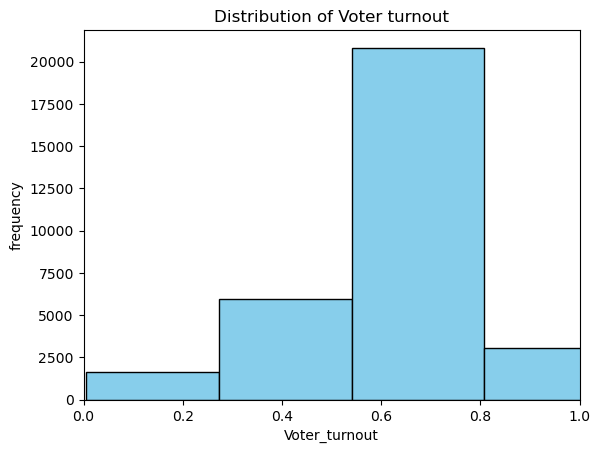

In [69]:
# visualizations

#sns.boxplot(x = 'voter_turnout', data = merged_new_df)
plt.hist(merged_new_df['voter_turnout'],  edgecolor = 'black', color = 'skyblue')
plt.xlim(0,1)
plt.xlabel('Voter_turnout')
plt.ylabel('frequency')
plt.title('Distribution of Voter turnout')

**Description**

voter turnout on average seems to be high, with the peak at around 0.7 which means a 70% voter turnout rate at the county level. Even historically this is on the higher side of voter turnout rates from the 2000's onwards. (US elections project). This may suggest that polarization may have increased political participation as opposed to reducing at as the book 'Red Nation, Blue Nation' suggests. T

**Interpretation**

his could also be due to the other exogenous controls we are considering in the model. Covid may be one such factor that increased voter participation as suggested by the research. This could be because more people wished to vote so as to curtail Trump's policies or insure against the perceived negative impact of Biden's proposed policies.

Let us get a sneak peek to see if our additional exogenous controls (poverty, covid cases, mean commute time, race) may be the cause of higher turnout rates.

Text(0.5, 1.0, 'SCATTERPLOT OF VOTER TURNOUT TO COVID CASES')

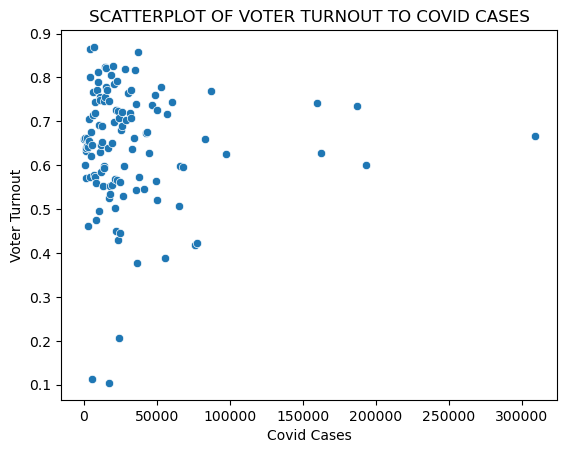

In [70]:
merged_new_df['cases_bin'] = pd.cut(merged_new_df['cases'], bins=1000)  # Adjust the number of bins as needed
merged_new_df['cases_bin_midpoint'] = merged_new_df['cases_bin'].apply(lambda x: x.mid).astype(float)
summary_df_case = merged_new_df.groupby('cases_bin_midpoint').agg({'voter_turnout':'mean'}).reset_index()

sns.scatterplot(x=summary_df_case['cases_bin_midpoint'], y=summary_df_case['voter_turnout'])
plt.xlabel('Covid Cases')
plt.ylabel('Voter Turnout')
plt.title('SCATTERPLOT OF VOTER TURNOUT TO COVID CASES')

#sns.scatterplot(x = 'cases', y = 'voter_turnout' ,data = merged_new_df)


Text(0.5, 1.0, 'SCATTERPLOT OF VOTER TURNOUT TO NUMBER OF PEOPLE IN POVERTY')

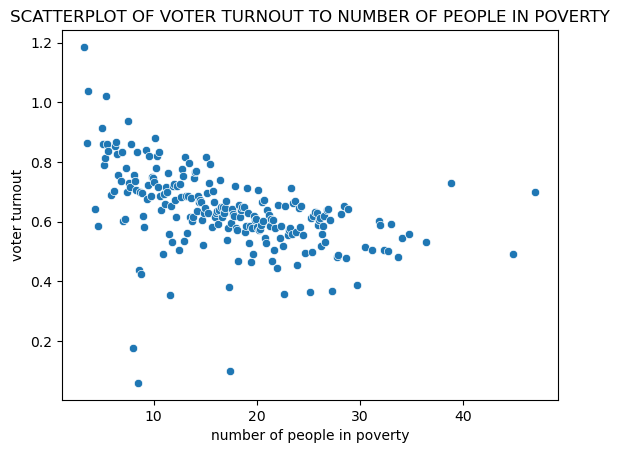

In [71]:
merged_new_df['poverty_bin'] = pd.cut(merged_new_df['Poverty'], bins=5000)  # Adjust the number of bins as needed
merged_new_df['poverty_bin_midpoint'] = merged_new_df['poverty_bin'].apply(lambda x: x.mid).astype(float)
summary_df_pov = merged_new_df.groupby('poverty_bin_midpoint').agg({'voter_turnout':'mean'}).reset_index()

sns.scatterplot(x=summary_df_pov['poverty_bin_midpoint'], y=summary_df_pov['voter_turnout'])
plt.xlabel('number of people in poverty')
plt.ylabel('voter turnout')
plt.title('SCATTERPLOT OF VOTER TURNOUT TO NUMBER OF PEOPLE IN POVERTY')

#sns.scatterplot(x = 'Poverty', y = 'voter_turnout',data = merged_new_df)


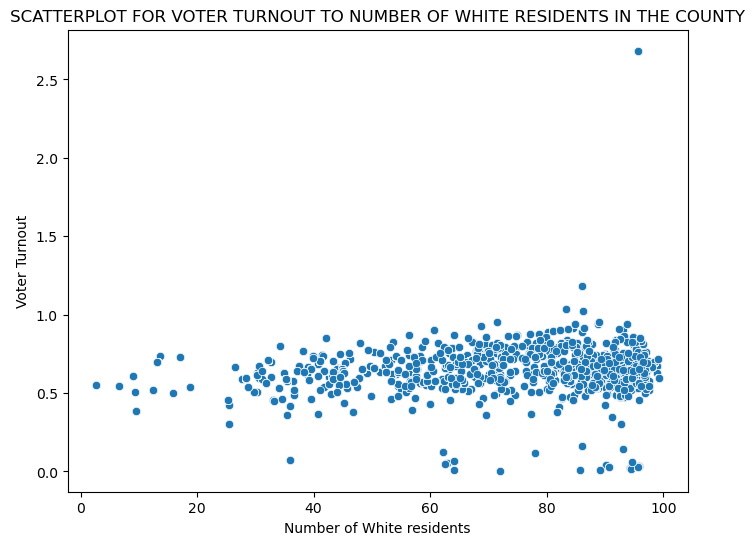

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = merged_new_df['White'], y=merged_new_df['voter_turnout'])
plt.xlabel('Number of White residents')
plt.ylabel('Voter Turnout')
plt.title('SCATTERPLOT FOR VOTER TURNOUT TO NUMBER OF WHITE RESIDENTS IN THE COUNTY')
plt.show()

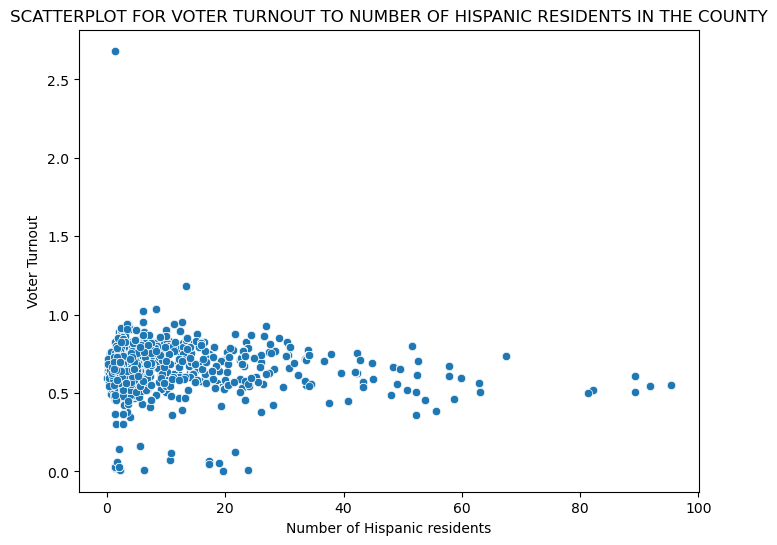

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = merged_new_df['Hispanic'], y=merged_new_df['voter_turnout'])
plt.xlabel('Number of Hispanic residents')
plt.ylabel('Voter Turnout')
plt.title('SCATTERPLOT FOR VOTER TURNOUT TO NUMBER OF HISPANIC RESIDENTS IN THE COUNTY')
plt.show()

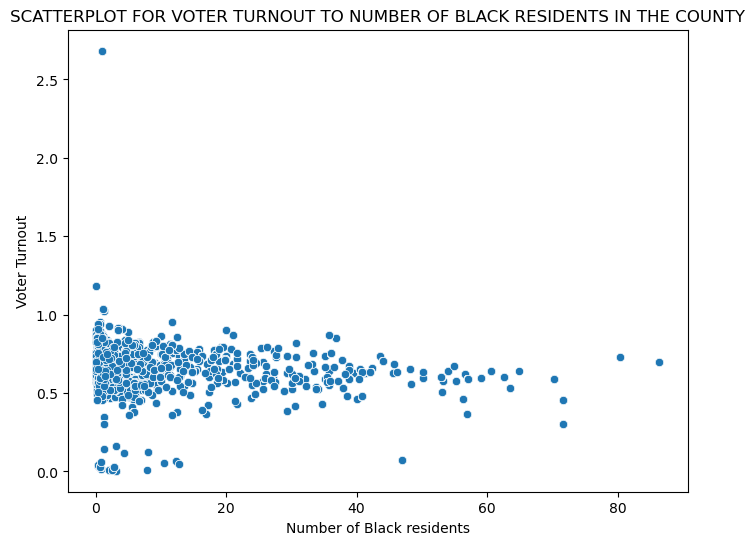

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = merged_new_df['Black'], y=merged_new_df['voter_turnout'])
plt.xlabel('Number of Black residents')
plt.ylabel('Voter Turnout')
plt.title('SCATTERPLOT FOR VOTER TURNOUT TO NUMBER OF BLACK RESIDENTS IN THE COUNTY')
plt.show()

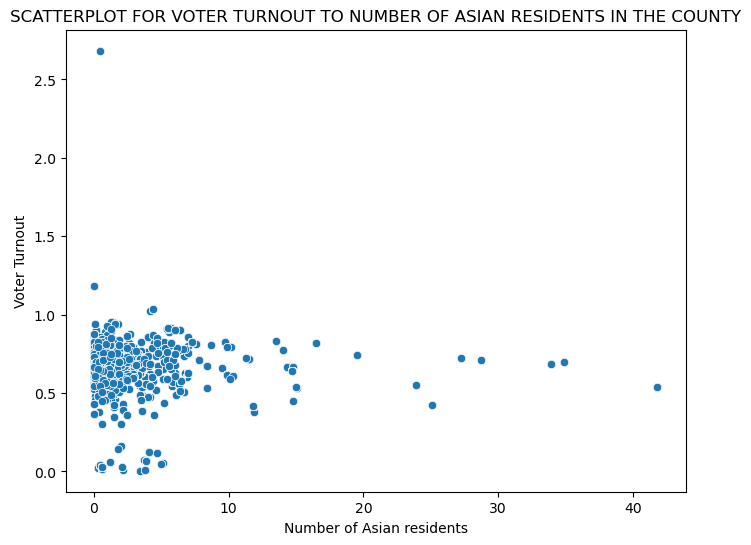

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = merged_new_df['Asian'], y=merged_new_df['voter_turnout'])
plt.xlabel('Number of Asian residents')
plt.ylabel('Voter Turnout')
plt.title('SCATTERPLOT FOR VOTER TURNOUT TO NUMBER OF ASIAN RESIDENTS IN THE COUNTY')
plt.show()

In [76]:
merged_new_df.to_csv('225_data.csv',index=False)

**interpretation**

Based on our scatterplots, it does not seem like our added exogenous controls have a very strong correlation with voter turnout.

number of people in poverty seems to have a negative correlation with voter turnout i.e that the more people that are in poverty, the less they participate in voting.

When it comes to the races, all of them have an approximately linear relationship with voter turnout, but the relationship is not very significant. These means voter turnout does not vary between races or that no one race is more politically active than the other. 

This suggests that either polarization (which is a measure of twitter sentiment extremity) explains significant variation in voter turnout or that there are other exogenous variables we are not considering. Another potential explanation could be that the twitter data and the counties depicted are not representative i.e that they represent counties that do not represent the norm when it comes to these trends (as we have research evidence of correlation between our exogenous controls and the response)

A causal statement on the variables in use and whether they are part of the true model will be explored when we run the regression model.

**merging some more data**

The next few steps would be to merge educational level and marriage status as predictors at the county level. Based on the data in the US census bureau, we are merging the number of people who have a high school, bachelors and masters degree at the county level along with the number of married households at the county level. 

In [77]:
#merging education status and marriage status
social_char = pd.read_csv('social_characteristics_US.csv')


In [78]:
social_char.head()

,GEO_ID,NAME,DP02_0001E,DP02_0001M,DP02_0002E,DP02_0002M,DP02_0003E,DP02_0003M,DP02_0004E,DP02_0004M,...,DP02_0150PM,DP02_0151PE,DP02_0151PM,DP02_0152PE,DP02_0152PM,DP02_0153PE,DP02_0153PM,DP02_0154PE,DP02_0154PM,Unnamed: 618
0,Geography,Geographic Area Name,Estimate!!HOUSEHOLDS BY TYPE!!Total households,Margin of Error!!HOUSEHOLDS BY TYPE!!Total hou...,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,Margin of Error!!HOUSEHOLDS BY TYPE!!Total hou...,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,Margin of Error!!HOUSEHOLDS BY TYPE!!Total hou...,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,Margin of Error!!HOUSEHOLDS BY TYPE!!Total hou...,...,Percent Margin of Error!!ANCESTRY!!Total popul...,Percent!!ANCESTRY!!Total population!!West Indi...,Percent Margin of Error!!ANCESTRY!!Total popul...,Percent!!COMPUTERS AND INTERNET USE!!Total hou...,Percent Margin of Error!!COMPUTERS AND INTERNE...,Percent!!COMPUTERS AND INTERNET USE!!Total hou...,Percent Margin of Error!!COMPUTERS AND INTERNE...,Percent!!COMPUTERS AND INTERNET USE!!Total hou...,Percent Margin of Error!!COMPUTERS AND INTERNE...,NaN
1,0500000US01001,"Autauga County, Alabama",21559,366,11281,552,(X),(X),782,227,...,0.4,0.0,0.1,21559,(X),91.4,1.0,82.7,1.8,NaN
2,0500000US01003,"Baldwin County, Alabama",84047,1143,46277,1550,(X),(X),3366,613,...,0.1,0.1,0.1,84047,(X),91.8,0.8,85.1,1.2,NaN
3,0500000US01005,"Barbour County, Alabama",9322,338,3613,305,(X),(X),436,157,...,0.2,1.4,1.0,9322,(X),79.8,2.6,64.6,3.5,NaN
4,0500000US01007,"Bibb County, Alabama",7259,299,3597,382,(X),(X),144,70,...,1.2,0.0,0.2,7259,(X),83.2,3.8,76.1,3.4,NaN


In [79]:
numeric_column_names3 = {col: i for i,col in enumerate(social_char.columns)}
social_char = social_char.rename(columns = numeric_column_names3)
social_char[4] # married households
social_char[130] # bachelors degree number
social_char[124] # high school degrees
social_char[132] # graduate and professional degree
df_educ_mar = pd.DataFrame({'county':social_char[1],'married_households':social_char[4], 'bachelors_degrees':social_char[130], 'high_school':social_char[124], 'graduate_degrees':social_char[132]})
df_educ_mar = df_educ_mar.drop(0)
df_educ_mar[['county_name', 'state_name']] = df_educ_mar['county'].str.split(', ', expand=True)
df_educ_mar.head()


,county,married_households,bachelors_degrees,high_school,graduate_degrees,county_name,state_name
1,"Autauga County, Alabama",11281,6320,11880,4401,Autauga County,Alabama
2,"Baldwin County, Alabama",46277,31444,42272,18192,Baldwin County,Alabama
3,"Barbour County, Alabama",3613,1296,6361,771,Barbour County,Alabama
4,"Bibb County, Alabama",3597,1183,7206,631,Bibb County,Alabama
5,"Blount County, Alabama",12053,3540,13975,1736,Blount County,Alabama


In [80]:
merged_new_df = pd.merge(merged_new_df,df_educ_mar,left_on=['NAMELSAD','state_x'], right_on=['county_name','state_name'],suffixes = ('county_name','state_name'))
merged_new_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,cases_bin_midpoint,poverty_bin,poverty_bin_midpoint,countystate_name,married_households,bachelors_degrees,high_school,graduate_degrees,county_name,state_name
0,2020-10-19 06:10:47,1.318072e+18,#DumpFascistTrump2020‼️ #Trump has #corrupted ...,1.0,1.0,Twitter for Android,29800708.0,📛End US Fascism📛,EndUSFascism,📛#AntiFascist\n📛#EndUSFascism\n📛#StopHateforPr...,...,28909.265,"(18.298, 18.307]",18.3025,"Pima County, Arizona",177538,135389,150259,99943,Pima County,Arizona
1,2020-10-19 16:13:37,1.318224e+18,"Trump Calls Dr. Fauci ‘Disaster,’ Says He Woul...",11.0,5.0,Twitter for iPhone,790624550.0,Ryan Shead,RyanShead,#husband | #father | #advocate | #creator | #a...,...,28909.265,"(18.298, 18.307]",18.3025,"Pima County, Arizona",177538,135389,150259,99943,Pima County,Arizona
2,2020-10-19 18:13:20,1.318254e+18,@khankiso I am proud as hell of my mayor. I wi...,38.0,4.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,28909.265,"(18.298, 18.307]",18.3025,"Pima County, Arizona",177538,135389,150259,99943,Pima County,Arizona
3,2020-10-16 15:11:37,1.317121e+18,If #Trump had #Covid then I'm a ballerina!! An...,0.0,1.0,Twitter Web App,15564433.0,Desert Author,Desert_Author,🐬Author of 5 #novels & INTO the WILD BLUE YOND...,...,28909.265,"(18.298, 18.307]",18.3025,"Pima County, Arizona",177538,135389,150259,99943,Pima County,Arizona
4,2020-10-21 18:37:44,1.318985e+18,#Trump is grifting &amp; money laundering that...,2.0,0.0,Twitter Web App,22275767.0,Ann Marie Hoff,Annimallover,"Follow on Instagram: Samson_Speaks\nAuthor, Ar...",...,28909.265,"(18.298, 18.307]",18.3025,"Pima County, Arizona",177538,135389,150259,99943,Pima County,Arizona


In [81]:
def age_group(age):
    age_brackets = []
    for i in age:
        if 18 <= i <=25:
            age_brackets.append('18-25')
        elif 25<i<=35:
            age_brackets.append('25-35')
        elif 35<i<=50:
            age_brackets.append('35-50')
        elif 50<i<=65:
            age_brackets.append('50-65')
        else:
            age_brackets.append('65-80')
    return age_brackets
        
merged_new_df['age_group'] = age_group(merged_new_df['median_age'])
merged_new_df['age_group'].unique()
            
            
    
        

array(['35-50', '25-35', '50-65', '18-25'], dtype=object)

In [82]:
merged_new_df['age_group'] = merged_new_df['age_group'].astype('category')

In [83]:
merged_new_df['age_group'].head()

0    35-50
1    35-50
2    35-50
3    35-50
4    35-50
Name: age_group, dtype: category
Categories (4, object): ['18-25', '25-35', '35-50', '50-65']

In [84]:
merged_new_df['married_households'] = pd.to_numeric(merged_new_df['married_households'], errors='coerce')
merged_new_df['high_school'] = pd.to_numeric(merged_new_df['high_school'], errors='coerce')

In [85]:
merged_new_df['const'] = 1

In [86]:
merged_new_df['bachelors_degrees'] = pd.to_numeric(merged_new_df['bachelors_degrees'], errors='coerce')
merged_new_df['graduate_degrees'] = pd.to_numeric(merged_new_df['graduate_degrees'], errors='coerce')
merged_new_df['White'] = pd.to_numeric(merged_new_df['White'], errors='coerce')
merged_new_df['Black'] = pd.to_numeric(merged_new_df['Black'], errors='coerce')
merged_new_df['Hispanic'] = pd.to_numeric(merged_new_df['Hispanic'], errors='coerce')
merged_new_df['Asian'] = pd.to_numeric(merged_new_df['Asian'], errors='coerce')

array(['35-50', '25-35', '50-65', '18-25'], dtype=object)

In [87]:
merged_new_df['age_18_25'] = merged_new_df['age_group'] == '18-25'
merged_new_df['age_18_25'] = merged_new_df['age_18_25'].astype('int')

merged_new_df['age_25_35'] = merged_new_df['age_group'] == '25-35'
merged_new_df['age_25_35'] = merged_new_df['age_25_35'].astype('int')

merged_new_df['age_35_50'] = merged_new_df['age_group'] == '35-50'
merged_new_df['age_35_50'] = merged_new_df['age_35_50'].astype('int')

# part 3: OLS regression


**nature of relationship between response and predictors**

As per our scatterplots with voter turnout as the dependent variable, and some of our new predictors (like covid cases, poverty ,races) we see that the relationship is approximately linear. As per our exploration of age and income distributions between pro-trump and anti-trump supporters, the normality of the distribution suggests that its effect on voter turnout is also likely linear. Our distribution of sentiment scores is also very normalized, which implies that its effect is likely linear. 

**Selection of predictors**

 The number of cases can affect voter turnout as a voter may chose not to vote if there is a high case count, citing the risk of infection as a reason to stay at home. According to a study The COVID-19 pandemic and the 2020 US presidential election by Leonardo Baccini, Abel Brodeur, and Stephen Weymouth, there exists a signficiant positive correlation between covid cases and voter turnout where covid cases increased voter mobilization (contrary to our hypothesis) when they ran a 2SLS Instrumental variable regression. This suggests that the nunber of cases can have a potential effect on voter turnout.

poverty also influences voter turnout. the lower the family income relative to the poverty line, the lower the voter turnout. This was established by a Columbia study by Professor Robert Hartley in his report Unleashing the Power of Poor and Low-Income Americans. Thus, poverty status does affect voter turnout.

Moreover, according to the MIT Election lab voter turnout is affected by 'income, older age, and being married'. This justifies our inclusion of Age and Income to our data. We will incorporate marriage status later.

In the paper ‘Using Experiments to Estimate the Effects of Education on Voter Turnout’ by Rachel Milstein and Donal P Green, the findings conclude that there is a well documented strong relationship between education level and voter turnout. Moreover, this relationship has a strong causal grounding as well.

In ‘who votes now,  Demographics, issues, Inequality and turnout in the United States' By Jan E Leighley and Jonathan Neigler’ states that there are significant disparities in voter turnout rates among different racial groups in the United States. Specifically, it points out that African Americans and Hispanics have historically lower voter turnout rates compared to Whites.

Thus, our predictors of interest have been added based on the following literature and the stated relationship between our predictors and voter turnout.



 8 models
- full model: with age as categorical and weighted sentiments by follower
- 2: age as median
- 3: compound score not weighted sentiments
- 4: sentiment score weighted by likes
- 5: weighted sentiment by follower interaction with educational variables
- 6: weighed sentiment by follower interaction with race variables
- 7: weighted sentiment score by follower interaction with age categories
- 8: Income inceraction term with weighted sentiments by followers





model 1:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{age 18-25}} + B_{3}{\text{age 25-35}} + B_{4}{\text{age 35-50}} + B_{5}{\text{weighted sentiments follower}} + B_{6}{\text{cases}} + B_{7}{\text{Poverty}} + B_{8}{\text{married households}} + B_{9}{\text{high school}} + B_{10}{\text{bachelors degrees}} + B_{11}{\text{graduate degrees}} + B_{12}{\text{White}} + B_{13}{\text{Black}} + B_{14}{\text{Hispanic}} + B_{15}{\text{Asian}}$


Model 2:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{median age}} + B_{3}{\text{weighted sentiments follower}} + B_{4}{\text{cases}} + B_{5}{\text{Poverty}} + B_{6}{\text{married households}} + B_{7}{\text{high school}} + B_{8}{\text{bachelors degrees}} + B_{9}{\text{graduate degrees}} + B_{10}{\text{White}} + B_{11}{\text{Black}} + B_{12}{\text{Hispanic}} + B_{13}{\text{Asian}}$


Model 3:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{median age}} + B_{3}{\text{compound score}} + B_{4}{\text{cases}} + B_{5}{\text{Poverty}} + B_{6}{\text{married households}} + B_{7}{\text{high school}} + B_{8}{\text{bachelors degrees}} + B_{9}{\text{graduate degrees}} + B_{10}{\text{White}} + B_{11}{\text{Black}} + B_{12}{\text{Hispanic}} + B_{13}{\text{Asian}}$


Model 4:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{age 18-25}} + B_{3}{\text{age 25-35}} + B_{4}{\text{age 35-50}} + B_{5}{\text{weighted sentiments likes}} + B_{6}{\text{cases}} + B_{7}{\text{Poverty}} + B_{8}{\text{married households}} + B_{9}{\text{high school}} + B_{10}{\text{bachelors degrees}} + B_{11}{\text{graduate degrees}} + B_{12}{\text{White}} + B_{13}{\text{Black}} + B_{14}{\text{Hispanic}} + B_{15}{\text{Asian}}$


Model 5:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{age 18-25}} + B_{3}{\text{age 25-35}} + B_{4}{\text{age 35-50}} + B_{5}{\text{weighted sentiments follower}} + B_{6}{\text{Poverty}} + B_{7}{\text{interaction sent age 18-25}} + B_{8}{\text{interaction sent age 25-35}} + B_{9}{\text{interaction sent age 35-50}}$


Model 6:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{weighted sentiments follower}} + B_{3}{\text{Poverty}} + B_{4}{\text{White}} + B_{5}{\text{Black}} + B_{6}{\text{Hispanic}} + B_{7}{\text{Asian}} + B_{8}{\text{interaction sent race White}} + B_{9}{\text{interaction sent race Black}} + B_{10}{\text{interaction sent race Hispanic}} + B_{11}{\text{interaction sent race Asian}}$


Model 7:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{weighted sentiments follower}} + B_{3}{\text{Poverty}} + B_{4}{\text{bachelors degrees}} + B_{5}{\text{graduate degrees}} + B_{6}{\text{interaction sent bachelors}} + B_{7}{\text{interaction sent graduate}}$


Model 8:
\
$Y = B_{0} + B_{1}{\text{median income}} + B_{2}{\text{weighted sentiments follower}} + B_{3}{\text{Poverty}} + B_{4}{\text{interaction sent income}}$


The reason I wish to run these specific regressions are for the purpose of compare and contrast

My full model contains all desirable variables that influence voter turnout.
- model 2 consists of median age as a continous numeric variable as opposed to categories. This is done to evaluate the overall impact of age and whether the categories tell a different story
- model 3 consists of regular compound score (sentiment score) as opposed to the weighted sentiments. This is important as it helps us compare how sentiments influence voter turnout depending on our 'reach factors'
- model 4 is another important model which consists of sentiments weighted by likes. Here, we can compare and contrast the coefficient from that in model 3 and model 1. This will grant us an understanding of likes as a 'reach' factor.
- model 5 seeks to investigate whether different age groups change the relationship that sentiment has with voter turnout. In other words, we are seeing how people from different age groups politically engage or disengage when there is sentiment polarization.
- model 6 creates interaction terms between sentiments weighted by followers and race to see if different races change their political engagement differently when sentiment polarization increases.
- model 7 does the same as before but for education levels (bachelors and graduate)
- model 8 interacts sentiments with income to see if people in different income levels engage differently when sentiment polarization increases.


In [96]:
# developing interaction terms
#age
merged_new_df['interaction_sent_age_18-25'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['age_18_25']
merged_new_df['interaction_sent_age_25-35'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['age_25_35']
merged_new_df['interaction_sent_age_35-50'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['age_35_50']
#race
merged_new_df['interaction_sent_race_white'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['White']
merged_new_df['interaction_sent_race_black'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['Black']
merged_new_df['interaction_sent_race_hispanic'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['Hispanic']
merged_new_df['interaction_sent_race_asian'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['Asian']

#educational level
merged_new_df['interaction_sent_bachelors'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['bachelors_degrees']
merged_new_df['interaction_sent_graduate'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['graduate_degrees']

#income
merged_new_df['interaction_sent_income'] = merged_new_df['weighted_sentiments_follower']*merged_new_df['median_income']



In [97]:
X1 = ['const','median_income', 'age_18_25','age_25_35','age_35_50', 'weighted_sentiments_follower','cases','Poverty','married_households','high_school','bachelors_degrees','graduate_degrees','White','Black','Hispanic','Asian']
X2 = ['const','median_income','median_age','weighted_sentiments_follower','cases','Poverty','married_households','high_school','bachelors_degrees','graduate_degrees','White','Black','Hispanic','Asian']
X3 = ['const','median_income', 'median_age','compound_score','cases','Poverty','married_households','high_school','bachelors_degrees','graduate_degrees','White','Black','Hispanic','Asian']
X4 = ['const','median_income', 'age_18_25','age_25_35','age_35_50', 'weighted_sentiments_likes','cases','Poverty','married_households','high_school','bachelors_degrees','graduate_degrees','White','Black','Hispanic','Asian']
X5 = ['const','median_income', 'age_18_25','age_25_35','age_35_50', 'weighted_sentiments_follower','Poverty','interaction_sent_age_18-25','interaction_sent_age_25-35','interaction_sent_age_35-50']
X6 = ['const','median_income','weighted_sentiments_follower','Poverty','White','Black','Hispanic','Asian','interaction_sent_race_white','interaction_sent_race_black','interaction_sent_race_hispanic','interaction_sent_race_asian']
X7 = ['const','median_income', 'weighted_sentiments_follower','Poverty','bachelors_degrees','graduate_degrees','interaction_sent_bachelors','interaction_sent_graduate']
X8 = ['const','median_income','weighted_sentiments_follower','Poverty','interaction_sent_income']

In [98]:
reg1 = sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X1], missing='drop').fit()
reg2 = sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X2], missing='drop').fit()
reg3 = sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X3], missing='drop').fit()
reg4 = sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X4], missing='drop').fit()
reg5 = sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X5], missing='drop').fit()
reg6 = sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X6], missing='drop').fit()
reg7 = sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X7], missing='drop').fit()
reg8=  sm.OLS(merged_new_df['voter_turnout'], merged_new_df[X8], missing='drop').fit()

In [99]:
from statsmodels.iolib.summary2 import summary_col
# this is used to specify the output type of the regression tables
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}",'F-statistic': lambda x: f"{x.fvalue:.2f}"}

In [100]:
results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.7f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                        'model4'],
                            info_dict=info_dict,
                            regressor_order=['const','median_income', 'age_18_25','age_25_35','age_35_50', 'weighted_sentiments',
                                             'cases','Poverty','married_households','high_school','bachelors_degrees',
                                             'graduate_degrees','White','Black','Hispanic','Asian'])

#results_table.add_title('Table 2 - OLS Regressions')



In [101]:
results_table2 = summary_col(results=[reg5,reg6,reg7,reg8],
                            float_format='%0.7f',
                            stars = True,
                            model_names=['Model 5',
                                         'Model 6',
                                         'Model 7','model 8'],
                                        
                            info_dict=info_dict,
                            regressor_order=['const','median_income', 'age_18_25','age_25_35','age_35_50', 'weighted_sentiments',
                                             'cases','Poverty','married_households','high_school','bachelors_degrees',
                                             'graduate_degrees','White','Black','Hispanic','Asian'])

#results_table.add_title('Table 2 - OLS Regressions')



In [5]:
! pip install stargazer > /dev/null

In [103]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [104]:
merged_new_df['NAME'] = merged_new_df['NAME'].astype('category')

In [105]:
stargazer = Stargazer([reg1, reg2, reg3,reg4])

HTML(stargazer.render_html())

In [106]:
stargazer1 = Stargazer([reg5,reg6,reg7,reg8])

HTML(stargazer1.render_html())

**analyzing results**


As per model 1, all age groups from around 18-50 negatively contribute to voter turnout. This is an odd result as we would assume that younger people are more likely to vote or are more politically active. Moreover, even adults until the age of 50 seem to not increase county-level voter turnout. Only for ages above 50 do we see that there is a positive contribution to voter turnout as implied in our intercept 1.45. This intercept means that given all else equal, someone above the age of 50 increases the mean voter turnout by 1.45 percentage points. If we look at model 2 (which has only median age) the coefficient for median age is 0.01167 which means that all else held constant, a per unit increase in median age increases mean voter turnout by 0.00167 percentage points. This implies that voters above the age of 50 constitute a large number of voters in the counties. 

**how it answers the research question**

Coming to our most important result. Model 1 shows that the coefficient of weighted sentiments is 0.153. In other words, the mean voter turnout increases by 0.153 points for a per unit change in weighted sentiments(by follower). This implies that the more extreme or strong the sentiment of the opinion is, the greater it contributes to voter turnout. This is line with the mobilization hypothesis that higher polarization actually increases turnout. What is interesting is that if we look at model 3, the coefficient for compound score(sentiment score) is -0.002. This is very interesting as it suggests that any increase in positive(pro-trump) sentiments actually reduces voter turnout whereas the model 1 estimate suggests the opposite. Not only that, the coefficient for weighted sentiments is much larger than that of compound score. This difference can be related back to the formula of weighted sentiments. We are looking at the 'reach' of sentiments expressed using the follower count of the account that posted the tweet. A large number of negative sentiments with accounts with low follower counts do not have as much of an impact. However, given that the weighted sentiments distribution has more sentiment scores in the positive side it implies that even if we have a few pro-trump accounts, they are influential. This is a game changer, as the influence of accounts affects the reach of the political sentiment expressed. This suggests, that very influential accounts may have posted pro-trump rhetoric which contributed to higher voter turnout on average. Now when we look at sentiments weighted by likes in model 4, curiously a per unit increase in sentiment score reduces voter turnout by -0.092 percentage points. This is opposite to sentiments weighted by follower and in line with the effect of compound score. However, sentiments weighted by likes reduces voter turnout by a relatively less margin compared to compound score. 

Now we face the reality that when we use followers as a reach factor, voter turnout increases but the opposite is true for likes as a reach factor. So sentiments weighted by followers does fit the mobilization hypothesis but sentiments weighted by likes does not. This may have something to do with the general political position the reach factors suggest. Sentiments weighted by likes are generally more pro-trump and sentiments weighted by follower is generally more anti-trump. This could hint that polarization with extremity of sentiments in the pro-trump side demobilizes voters or makes them less want to vote, whereas polarization with extremity of sentiments in the anti-trump side mobilizes people or makes them want to vote. What we are not sure of, is whether likes or followers is a better reach factor that models population political preferences. However, if we were to consider the fact that Biden won it could suggest that greater anti-trump sentiments or the fear of Trump's reelection was a good motivator for people to vote, then it suggests that sentiments weighted by followers is closer to the populations political preferences.

The remaining models incorporate interaction terms with sentiment scores to evaluate how polarization(weighted sentiment score) affects political engagement(voter turnout) within different age groups, races, and education levels. 

Now in model 5 we look to see whether age group changes the relationship between weighted sentiment scores and voter turnout. Based on the coefficients, any increase in sentiments within the 35-50 age group reduces voter turnout relatively more than an increase in sentiments in the 25-35 group does. This implies that people in the 35-50 age group tend to vote lesser when sentiments are more extreme relative to people in the 25-35 age group. However, the p-values are massive which suggests that the coefficients are insignificant. This tells us that there is no real impact that age group has on the relationship between political engagement relative to the polarization of sentiments.

in model 6 we see create interaction terms for race to see how polarization influences political engagement between the races. Based on our coefficients, all the races reduce their political engagement as sentiments increase.

When we look at models 7 and 8, it shows that education level and income does not change the relationship that sentiment scores has with voter turnout, suggesting that people in different income groups and educational levels do not vote differently when sentiments become more polarized. 

**model performance evaluation**

in terms of model performance, most models have similar adjusted $R^2$ suggesting that the variation they explain is equivalent.  However, model 5 has an $R^2$ of 0.186 which is lower than all the other values which are 0.347 and above. This suggests that sentiments interacting with age group does not explain variation in voter turnout. Even the F-statistics of model 5 is much lower at around 903 compared to 1000 and above for models 1-4. Model 8 has the lowest adjusted $R^2$ of 0.157. Models 6 and 7 are the same, having lower adjusted $R^2$ and F-statistic compared to models 1-4. This is because they have less predictors and because the interaction terms are not significant.

## Machine learning

In order to increase the predictive power of our model and identify variables that are important in predicting voter turnout, we will turn to more sohpisticated models in the form of a regression tree model and a random forest model.

objective function
 $$\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in Rj}
    (y_i - \hat{y}_{Rj})^2 \right]$$

j is the number of predictors which in our case is 15 and s is the optimal split in predictor Xj. The summation is over all data points where the value of the j'th feature Xj is less than or equal to the split point s. Thus, what we are doing is finding the squared prediction error between the actual response Yi and the mean response in a specific region Rj for predictor Xj. We are then minimizing this prediction error i.e finding the splits that will give regions within the predictor space that minimizes this error. 

**explaining regularization parameters**

The main regularization parameters for our regression tree are
- maximum depth
- maximum split
- minimum samples leaf
- max features

maximum depth is the only parameter we directly control. This basically controls how many levels the regression tree will have. Although more levels will lead to lower variance in the training data it could lead to overfitting in the testing data. 

maximum split is the number of samples required to split a node. This helps ensure nodes don't split too often into areas where there is not much data. Points to the problem of overiftting again

maximum samples leaf specifies the minimum number of samples required to be at a leaf node. A leaf node is the last node with the mean response value. This is important, since a leaf node with a very small number of samples would mean that the generalizability of the regression tree can be questioned.

max features puts a limit on the number of features/variables that are considered for a split. This prevents overfitting by considering too many variables to predict the data.



In [87]:
merged_new_df.dropna(subset=['voter_turnout'], inplace=True)
merged_new_df.dropna(inplace=True)
y_tree = merged_new_df['voter_turnout']


In [88]:
n = merged_new_df.isnull().sum()
print(n.sum())

0


We will select all the predictors from our full model and see that the regression tree outputs.

In [89]:
x_tree = merged_new_df[['median_income', 'age_18_25','age_25_35','age_35_50', 'weighted_sentiments_follower','cases','Poverty','married_households','high_school','bachelors_degrees','graduate_degrees','White','Black','Hispanic','Asian']]
x_tree.head()

,median_income,age_18_25,age_25_35,age_35_50,weighted_sentiments_follower,cases,Poverty,married_households,high_school,bachelors_degrees,graduate_degrees,White,Black,Hispanic,Asian
761,119136.0,0,0,1,0.000000,12454.0,11.7,129435.0,80686.0,244101.0,165240.0,40.8,5.1,15.3,33.9
762,119136.0,0,0,1,0.000260,12454.0,11.7,129435.0,80686.0,244101.0,165240.0,40.8,5.1,15.3,33.9
763,119136.0,0,0,1,-0.000273,12454.0,11.7,129435.0,80686.0,244101.0,165240.0,40.8,5.1,15.3,33.9
764,119136.0,0,0,1,0.000000,12454.0,11.7,129435.0,80686.0,244101.0,165240.0,40.8,5.1,15.3,33.9
765,119136.0,0,0,1,0.000020,12454.0,11.7,129435.0,80686.0,244101.0,165240.0,40.8,5.1,15.3,33.9


In [90]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

In [91]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(x_tree,y_tree)

In [92]:
y_pred_tree = sqft_tree.predict(x_tree)

# find the error of prediction (MSE)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_tree, y_pred_tree))

Mean Squared Error: 0.014649575212652989


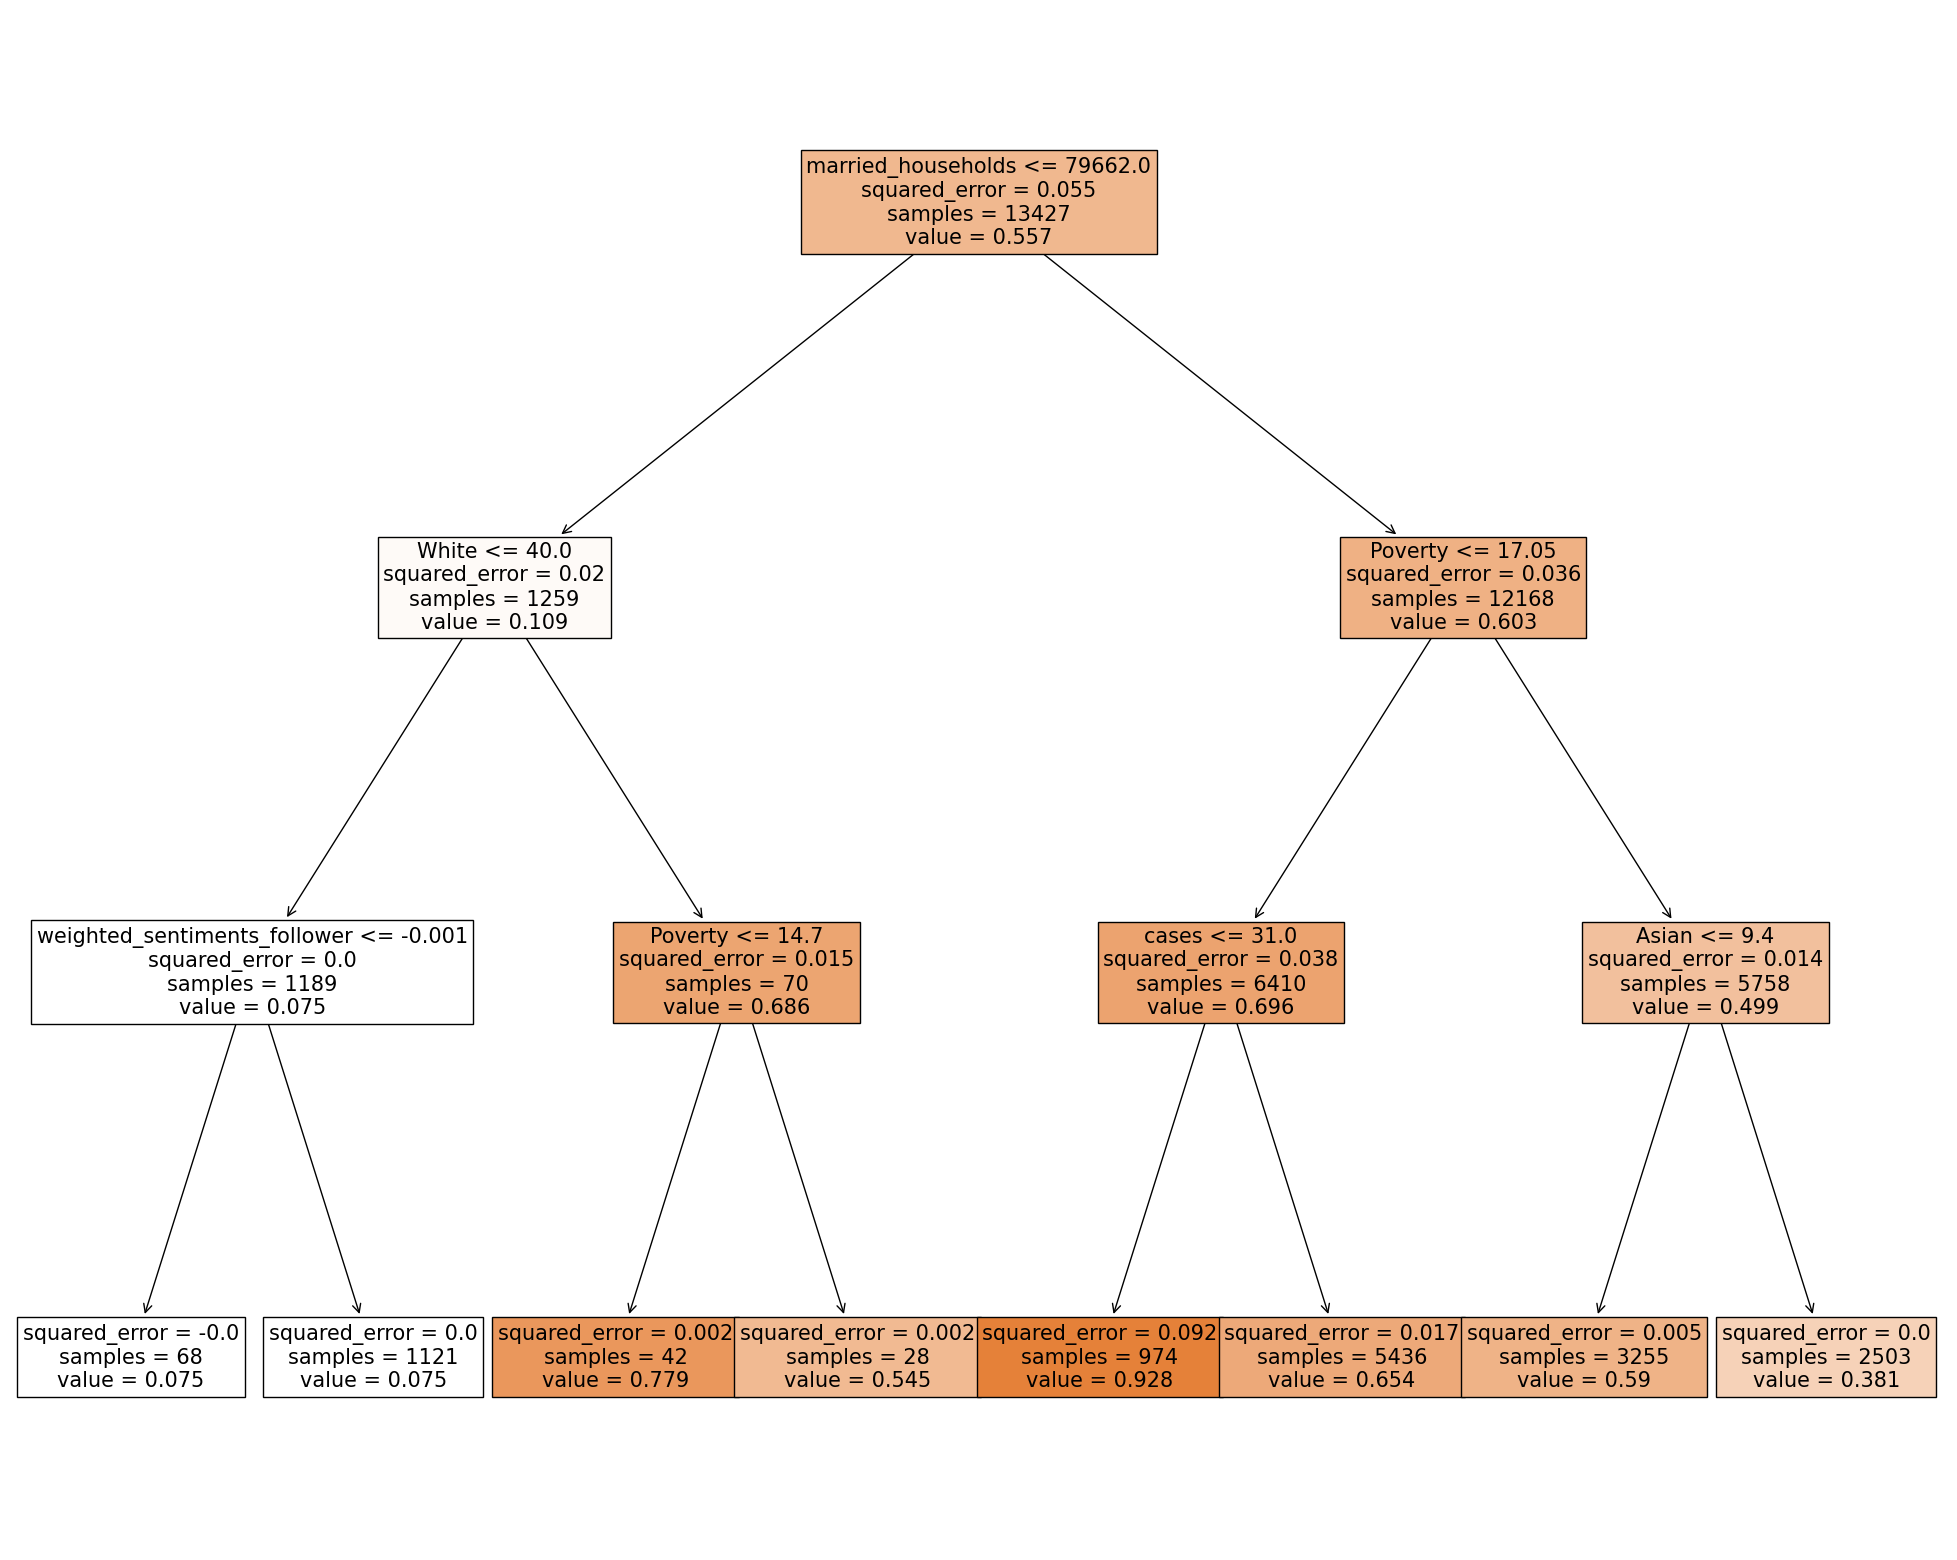

In [93]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=x_tree.columns, filled=True, fontsize=15)
#plt.savefig('tree_plot.jpg', format='jpeg')

The objective with our regression tree will be to identify which branches ultimately lead to the highest mean voter turnout value. This will give us an understanding of what predictors significantly contribute to high voter turnouts and which ones lead to low voter turnouts. Our starting node is marriage status, which is interesting considering that this was not significant in our regression models. Given that the number of people married in the county is less than 79,662 and the number of white people is lower than 40, and the weighted sentiment score is less than -0.001, we get a mean voter turnout of 7.5%. However, even if sentiments are positive (> -0.001) mean voter trunout is still 7.5% suggesting that sentiments don't matter.

Moreover, the threshold of importance is the number of white people. If the number of white people are more than 40, and if the the poverty level is less than 14.7, we have a high mean voter turnout of 77.9%. This suggests, that voter turnout is high among white americans. Moreover, it is high given that poverty levels are low. Even if poverty levels are above 14.7,voter turnout is 50% which is still much higher than counties with a small number of white residents.

The highest percentage for mean voter turnout observed (around 90%) is when the number of married households is high(>79662) and poverty levels are below 17.05. this suggests that married citizens are more likely to vote. Additionally, a low number of covid cases, less than 31 leads to mean voter turnout of 92.8%. thus, we can say that if the number of covid cases are high, people are discouraged to vote. This is evident through covid case count being above 31 which drops the mean voter turnout to 65.4%.

We can conclude from this tree that marriage status, number of white residents and poverty levels contribute to high mean voter turnout. Sentiment scores or polarization is not significant as per the tree which is in opposition to our regression model where sentiments weighted by follower count had a postive coefficient of +0.053.

The mean squared error is at 0.0146 which is quite good.


Now, we will run the random forest model to see how much the prediction error can be lowered while also plotting an importance matrix  to assess the important of our independent variables in terms of their predictive power.  


In [94]:
#random forest model
regr_RF = RandomForestRegressor(max_features=5, random_state=1).fit(x_tree, y_tree)
pred_RF = regr_RF.predict(x_tree)

mean_squared_error(y_tree,pred_RF)


1.364195278612033e-05

The mean squared error for our random forest model is: 1.36*10^-5 which is far lower than that of our regression tree. To achieve this, the importance of variables is as follows:


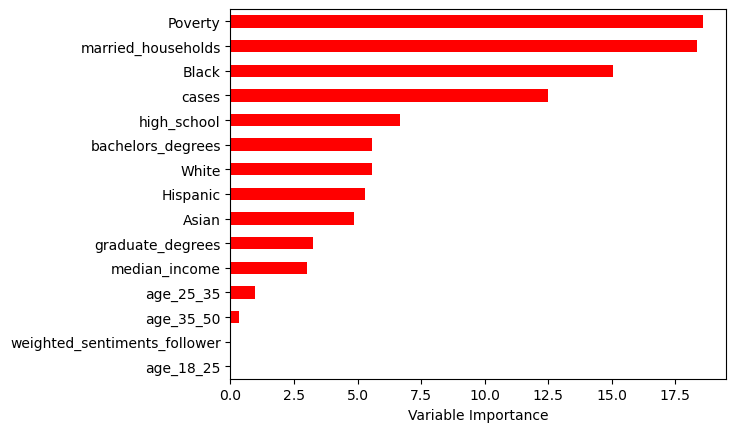

In [95]:
Importance = pd.DataFrame({'Importance':regr_RF.feature_importances_*100}, index=x_tree.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**Interpretation of importance matrix**

From the importance matrix we can see that poverty level, number of married households, and number of black residents are the predictors with the most predictive power. As evident in the regression tree, poverty level and marriage status are very important, but here poverty is the most important predictor for voter turnout. Interestingly, where number of White American residents was an important predictor, number of Black American residents is now an important predictor. Number of White American residents is less important relative to number of black American residents which is not something we saw in the regression tree. Moreover, the covid case count is pretty important as well which does make sense. Two other important predictors not seen in the tree is education level, wherein number of high school students is a more important predictor than the number of bachelors students. This fits into our initial justification for adding education level and covid cases which was that they influence voter turnout.

Age and income are the least important predictors which is surprising. I assumed younger people may want to vote and would be more politically active but it doesn't seem to be the case. Additionally, income level does not affect voter turnout a lot which is a good sign as it implies that there are no economic barriers to voting.

The most important conclusion perhaps is that the weighted sentiments(followers) is not significant at all, echoing the result of the regression tree. Thus, if we were to answer our research question based on this we would have to say that sentiment polarization in twitter has no impact on voter turnout i.e that it is not representative of the populations political preferences.

**comparing regression results to regression tree**

comparing regression results to regression tree
In our regression model, we captured the change in mean voter turnout conditional on our predictors of interest. Specifically when looking at sentiments weighted by followers, we captured that a per unit increase in sentiment scores increase mean voter turnout by 0.3 percentage points. 

Our regression tree gave us a different output, focusing less on the specific relationship between our predictors and response, instead picking a set of predictors and regions within the predictor space that best predicted voter turnout i.e gave the lowest mean squared error. Thus, the regression tree gave us insight into the important variables that create categories within our voter turnout data i.e predictors that cause significant variation in voter turnout. Based on this model, weighted sentiments was not significant at all. Another contradiction is that Poverty has a smaller effect than sentiments in the regression model but is an important internal node in the regression tree.

Other curious contradictions include the significance of covid cases and number of residents of a particular race. When we looked at scatterplots comparing covid cases and race of residents, there was no significant relationship. However, the importance matrix then states that these two predictors are important. Since the random forest model did bring a low mean squared error, this suggests that non-paramteric methods may be better to use compared to parametric methods as there is no strong linear relationship between voter turnout and cases/race which means that regression models won’t work well.


The reason for this could lie in the objective of each method. Regression models are parametric models which assume a linear functional form to allow for interpretability of the predictors influence on the response. Thus, we can investigate the potential effect twitter sentiments has on voter turnout without considering if sentiments significantly explains variation in voter turnout. Regression trees are non-parametric in that they are focused purely on prediction as opposed to interpretability. Thus, weighted sentiments can be a variable that influences voter turnout but not enough to justify being part of the regression tree. Tree's look purely at predictors that minimize prediction error. 

Another way to think about this is through the Least squares estimaton of linear coefficients. 
RSS = $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
Here we minimize the residual sum of squares relative to our slope and intercept coefficients in our fitted y value. The caveat here, is that the fitted value follows a linear functional form. Thus, this limits the ways in which the OLS algorithm can limit the prediction error.

For regression trees however:
    $\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in Rj}
    (y_i - \hat{y}_{Rj})^2 \right]$
here, the fitted value is based on the mean of the response in that region. The partitions that determine a region are flexible i.e they can be changed, modified using complexity prunning etc. In other words, the tree can find the optimal set of predictors and partitions without any functional constraint as seen in least squares estimation.

this is why the prediction error on the regression tree is much lower. In our case, the regression model serves out research question better in that it tells us the effect sentiment polarization has on voter turnout. Future studies can explore better ways to measure this polarization so that it is an effective predictor under the regression tree or random forest model. 



## Conclusion

Coming back to our research question of ‘Is the degree of political polarization in opinions given by Twitter users a good predictor of voter turnout in the 2020 US elections?’ We can conclude that based on our linear regression model, sentiments weighted by follower count as a measure of polarization increases voter turnout by 0.304 percentage points under the 5% significance level suggesting that polarization increases voter turnout in line with our mobilization hypothesis.

Based on our regression tree, weighted sentiments by follower count is not a significant predictor at all suggesting that other variables like poverty level, race, covid count, and marriage status are significant predictors of voter turnout. 

Thus, based on both model results we can say that twitter sentiment polarization does not explain much variation in voter turnout suggesting that US voters do not significantly consider the polarized political climate in their decision to vote. Therefore, twitter based sentiment polarization is not a good predictor of voter turnout. 

We also additionally found that our sample data seems to be representative based on our findings that there are no major differences in age and income between pro-trump and anti-trump twitter users. However, the existence of outliers in age and income data along with a potential anti-trump bias in out twitter data suggests some problems with the representativeness of our data. The abovementioned conclusion that twitter sentiment polarization is not a good predictor of voter turnout may stem from the fact that twitter sentiments are not a good proxy for the populations political preferences or that the group assumptions made are not valid.

This paper is unique in that it seeks to statistically compute the influence of sentiments/polarization on voter turnout while also calculating the predictive power of sentiment scores on variation in voter turnout. Other papers we’ve come across tend to use public opinion surveys to guage sentiments and do not really build statistical models to evaluate the predictive power of political polarization on voter turnout. The unique result of the paper is using a regression tree and random forest model to identify significant variables that influence voter turnout, and that sentiments is not one of them. 

This research can be developed further by creating more sophisticated regression models. One such idea is to create a multilevel model with a random intercept, varying by state and county. This will help us understand statistically how different states and geographies vote differently or how the sentiments of these geographies affect turnout differently. Moreover, finding an instrumental variable for sentiment score will be a very interesting extension as it will give us a better understanding of how sentiments affect voter turnout in the presence of potential endogeneity problems.

For our investigation on the representativeness of the data we could use classifiers like k-nearest neighbours, and other methods to create a good pro-trump anti-trump classification. In this paper we have used an arbitrary classification and so using better classifiers would be better to assess representativeness. Moreover, if state or county representation is skewed then we could use techniques like post-stratification to improve the generalizability of our model. 
The scope of this project could be extended to compare tweets as a means of measuring polarization with other data sources like public opinion surveys, polls etc.


# References

ABRAMOWITZ, ALAN I., and WALTER J. STONE. "The Bush Effect: Polarization, Turnout, and Activism in the 2004 Presidential Election." Presidential Studies Quarterly, vol. 36, no. 2, 2006, pp. 141-154.

Bor, Lee, & Oughton. (2023). Quantifying polarization across political groups on key policy issues using sentiment analysis. arxiv, 2, 34. https://doi.org/10.48550/arxiv.2302.07775

Brodeur, A., Baccini, L., & Weymouth, S. (2020). The COVID-19 pandemic and US presidential elections. https://doi.org/10.31222/osf.io/sxajv

Sondheimer, Rachel M., and Donald P. Green. "Using Experiments to Estimate the Effects of Education on Voter Turnout." American Journal of Political Science, vol. 54, no. 1, 2009, pp. 174-189.

Hartley, Departments of Statistics and Political Science, Columbia University. (2020, August). Unleashing the power of poor and low-income Americans. Poor People's Campaign. https://www.poorpeoplescampaign.org/resource/power-of-poor-voters/

Kim, S. S., & Zilinsky, J. (2022). Division does not imply predictability: Demographics continue to reveal little about voting and partisanship. Political Behavior, 46(1), 67-87. https://doi.org/10.1007/s11109-022-09816-z

Leighley, Jan E., and Jonathan Nagler. "Who Votes Now?" 2013.

Nivola, & Brady. (2006). Red and blue nation?: Characteristics and causes of America's polarized politics. The Brookings Institution. https://www.google.ca/books/edition/Red_and_Blue_Nation/NJexohM1HrwC?hl=en&gbpv=1
Page 4-5

Voter turnout | MIT election lab. (n.d.). MIT Election Lab. https://electionlab.mit.edu/research/voter-turnout

In [6]:
notebook_file = "ECO225 project .ipynb"
output_format = "pdf"

# Construct the command as a list of strings
command = ["jupyter", "nbconvert", "--to", output_format, notebook_file]

# Execute the command
subprocess.run(command)

[NbConvertApp] Converting notebook ECO225 project .ipynb to pdf
[NbConvertApp] Writing 1621470 bytes to ECO225 project .pdf


CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'pdf', 'ECO225 project .ipynb'], returncode=0)